<a href="https://colab.research.google.com/github/Rohan30/Rohan30/blob/main/RossStoreSalesPredAlmabetterTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - Retail Sales Prediction**

In [ ]:
hello

**Project Type** - **Regression**

**Contribution** - **Individual**

#**Problem Statement**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

#***Let's Begin !***

##***1. Know Your Data***

###Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###Dataset Loading

In [ ]:
#mount the dataset to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Datasets
df1=pd.read_csv('/content/drive/MyDrive/Copy of Rossmann Stores Data.csv',engine='python')
df2=pd.read_csv('/content/drive/MyDrive/Copy of store.csv')

###Dataset First View

In [ ]:
#first dataset
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df1.loc[df1['Store']==1096]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1095,1096,5,2015-07-31,9318,816,1,1,0,1
2210,1096,4,2015-07-30,6139,585,1,1,0,1
3325,1096,3,2015-07-29,5487,560,1,1,0,1
4440,1096,2,2015-07-28,6878,686,1,1,0,1
5555,1096,1,2015-07-27,8203,693,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1012730,1096,6,2013-01-05,3456,439,1,0,0,0
1013845,1096,5,2013-01-04,3995,526,1,0,0,1
1014960,1096,4,2013-01-03,3387,422,1,0,0,1
1016075,1096,3,2013-01-02,4330,528,1,0,0,1


In [ ]:
#second dataset
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


###Dataset Rows & Columns count

In [ ]:
# First Dataset Rows & Columns 
df1.shape

(1017209, 9)

In [ ]:
# Second Dataset Rows & Columns 
df2.shape

(1115, 10)

###Dataset Information

In [ ]:
# First Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Second Dataset Info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Duplicate Values

In [ ]:
# First Dataset Duplicate Value Count
len(df1[df1.duplicated()])

0

In [ ]:
# Second Dataset Duplicate Value Count
len(df2[df2.duplicated()])

0

Missing Values/Null Values

In [ ]:
#Missing Values for the first dataset
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are no null values for the first dataset.

In [ ]:
#Missing Values for the second dataset
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
#proportion of null values
df2.isnull().sum()/len(df2)

Store                        0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002691
CompetitionOpenSinceMonth    0.317489
CompetitionOpenSinceYear     0.317489
Promo2                       0.000000
Promo2SinceWeek              0.487892
Promo2SinceYear              0.487892
PromoInterval                0.487892
dtype: float64

There are a lot of missing values for the second dataset. The columns Promo2SinceWeek, Promo2SinceYear, PromoInterval have the most number of null values

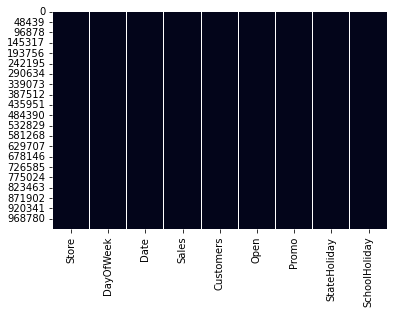

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df1.isnull(), cbar=False)

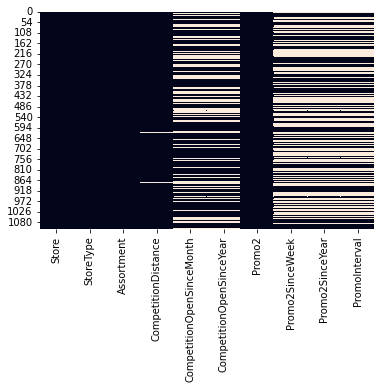

In [ ]:
sns.heatmap(df2.isnull(), cbar=False)

###What did you know about your dataset?



The datasets given are about the Retail Sales data for a chain of Rossmann stores, and we have to predict the sales made in a day.

The first dataset comprises of sales specific data and the no of holidays,promotions offered etc for each store whereas the second dataset comprises of store specific data on a deeper scale as to the types of assortments offered, competition related information, store type etc.

The first dataset has 1017209 rows and 9 columns. There are no mising values and duplicate values in the first dataset.

The second dataset has 1115 rows and 10 columns. There are no duplicate values but there are a lot of missing values in the dataset.

##***2. Understanding Your Variables***

In [ ]:
# First Dataset Columns
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Second Dataset Columns
df2.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
df1.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
df2.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


###Variables Description

Variables Involved in the first dataset:

**Store** - a unique Id for each store

**DayOfWeek** - a numerical respresentation for day of the week(eg:Monday-1, Tuesday-2 and so on)

**Date** - date on which sales were made for stores in (YYYY-MM-DD format)

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

Variables Involved in the second dataset:

**Store** - a unique Id for each store

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSinceMonth** - gives the approximate month of the time the nearest competitor was opened

**CompetitionOpenSinceYear** - gives the approximate year of the time the nearest competitor was opened

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2SinceWeek** - describes the calendar week when the store started participating in Promo2

**Promo2SinceYear** - describes the year when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

###Check Unique Values for each variable.


In [ ]:
# Check Unique Values for each variable.
for i in df1.columns.tolist():
  print("No. of unique values in ",i,"is",df1[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 4 .
No. of unique values in  SchoolHoliday is 2 .


In [ ]:
# Check Unique Values for each variable.
for i in df2.columns.tolist():
  print("No. of unique values in ",i,"is",df2[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 654 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoInterval is 3 .


##***3. Data Wrangling***

###Data Wrangling Code

Next we will merge both tables into one so we can more easily work with them. We will join the tables based on the shared Store column, which is a foreign key in the store table and a primary key in the stores_data table, so we'll validate the merge based on this many-to-one relationship.

In [ ]:
## merging both the tables
df3 = pd.merge(df1, df2 , how='left', on="Store")

In [ ]:
df3.shape

(1017209, 18)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
#creating 2 additional features to check instances of sales made and customers entered on a day to day basis.
df3['if_customer_came']=(np.where(df3['Customers']!=0,True,False))
#True stands for If customer came and False if customer didn't come
df3['if_sales_made']=(np.where(df3['Sales']!=0,True,False))
#True if sales were made  and False if sales weren't made

In [ ]:
df3['StateHoliday'].value_counts()

0    313914
a      6974
b      2190
c      1248
Name: StateHoliday, dtype: int64

In [ ]:
df3['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [ ]:
df3['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [ ]:
df3['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [ ]:
print(df3.groupby('StateHoliday')['Open'].value_counts())

StateHoliday  Open
0             1       843482
              0       142677
a             0        19566
              1          694
b             0         6545
              1          145
c             0         4029
              1           71
Name: Open, dtype: int64


In [ ]:
print(df3.groupby('StateHoliday')['Promo'].value_counts())

StateHoliday  Promo
0             0        608875
              1        377284
a             0         12809
              1          7451
b             0          3345
              1          3345
c             0          4100
Name: Promo, dtype: int64


In [ ]:
print(df3.groupby('StateHoliday')['if_customer_came'].value_counts())

StateHoliday  if_customer_came
0             True                843430
              False               142729
a             False                19566
              True                   694
b             False                 6545
              True                   145
c             False                 4029
              True                    71
Name: if_customer_came, dtype: int64


In [ ]:
print(df3.groupby('StateHoliday')['if_sales_made'].value_counts())

StateHoliday  if_sales_made
0             True             843428
              False            142731
a             False             19566
              True                694
b             False              6545
              True                145
c             False              4029
              True                 71
Name: if_sales_made, dtype: int64


In [ ]:
print(df3.groupby('SchoolHoliday')['Open'].value_counts())

SchoolHoliday  Open
0              1       680935
               0       154553
1              1       163457
               0        18264
Name: Open, dtype: int64


In [ ]:
print(df3.groupby('SchoolHoliday')['Promo'].value_counts())

SchoolHoliday  Promo
0              0        529510
               1        305978
1              0         99619
               1         82102
Name: Promo, dtype: int64


In [ ]:
print(df3.groupby('SchoolHoliday')['if_customer_came'].value_counts())

SchoolHoliday  if_customer_came
0              True                680895
               False               154593
1              True                163445
               False                18276
Name: if_customer_came, dtype: int64


In [ ]:
print(df3.groupby('SchoolHoliday')['if_sales_made'].value_counts())

SchoolHoliday  if_sales_made
0              True             680893
               False            154595
1              True             163445
               False             18276
Name: if_sales_made, dtype: int64


In [ ]:
#Doubt
print(df3.groupby('if_sales_made')['Promo'].value_counts())

if_sales_made  Promo
False          0        161666
               1         11205
True           0        467463
               1        376875
Name: Promo, dtype: int64


In [ ]:
print(df3.groupby('Promo')['Sales'].mean())

Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64


In [ ]:
print(df3.groupby('if_sales_made')['if_customer_came'].value_counts())

if_sales_made  if_customer_came
False          False               172869
               True                     2
True           True                844338
Name: if_customer_came, dtype: int64


In [ ]:
print(df3.groupby('if_sales_made')['Promo2'].value_counts())

if_sales_made  Promo2
False          1          88132
               0          84739
True           0         423292
               1         421046
Name: Promo2, dtype: int64


In [ ]:
print(df3.groupby('if_sales_made')['DayOfWeek'].value_counts())

if_sales_made  DayOfWeek
False          7            141137
               4             11219
               5              7212
               1              7173
               3              3743
               2              1709
               6               678
True           6            144052
               2            143955
               3            141922
               5            138633
               1            137557
               4            134626
               7              3593
Name: DayOfWeek, dtype: int64


In [ ]:
print(df3.groupby('if_sales_made')['StoreType'].value_counts())

if_sales_made  StoreType
False          a             94585
               d             54144
               c             23872
               b               270
True           a            457042
               d            258768
               c            112968
               b             15560
Name: StoreType, dtype: int64


In [ ]:
print(df3.groupby('if_sales_made')['Assortment'].value_counts())

if_sales_made  Assortment
False          a              92570
               c              80216
               b                 85
True           a             444875
               c             391254
               b               8209
Name: Assortment, dtype: int64


###What all manipulations have you done and insights you found?


Created 2 new features in the merged dataset about the number of instances sales were made and customers came.

Following were the initial insights obtained:

1)The number of days where there were no state holidays were the maximum and the number of days when the state holiday was Christmas was the minimum.

2)More days when there was no school holiday compared to days when there was a school holiday.

3)Stores were open on more days compared to days on which they were closed.

4)Promotions were offered on more days compared to days on which they were not offered.

5)Most number of stores were opeen when there was no state holiday. Least number of stores were open when the state holiday was Christmas.

6)No promotions were made when it was Christmas. One possible reason could be that the stores knew that there would be more inflow when there were other state holidays and offering promotions when there were no state holidays would bring in more revenue.

7)Least number of customers came and sales were made when the state holiday was Christmas.This could be due to the fact that no promotions were offered on Christmas.

8)Even though lesser number of promotions were offered when there was a School Holiday compared to no school holidays, relatively more promotions were offered for the above scenario.

9)Lesser number of customers came and sales were made when there was a school holiday compare to when there was no school holiday.

10)Most sales were made on Saturday and the least on Sunday.

11)Most Sales were made when assortment was type a and least when type b.

12)Most sales were made when store type was a and least when type b.

13) More sales occured when there were no continued promotions.

14)Sales made and customers who came to the store seem to be highly correlated since all except for 2 customers who came in the store, sales were made.

15) More average sales were made when promotions were offered compared to no promotions.


Some of the above observations could be confirmed using various visualisations. But deeper insights could be obtained through aggregation, variable creation techniques.

##***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
#creating a categorical column list
'''categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']'''

#numeric_variables=['Sales','Customers','CompetitionDistance']
#bool=['if_sales_made','if_customers_came']
#date- 'Date'
     

####Plot 1- Categorical Plot of Sales with respect to Promotions(Bi-Variate Analysis- Categorical and Numerical)

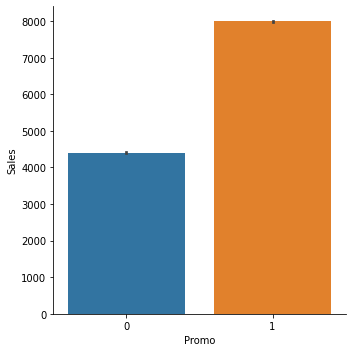

In [ ]:
sns.catplot(data=df3, x='Promo', y="Sales",kind='bar')

#####1. Why did you pick the specific chart?

A categorical plot is the best way of representing data when there is a categorical variable and a numeric variable. There is a kind parameter where you can specify the type of plot to be produced. By default, the mean values of each category is plotted.

#####2. What is/are the insight(s) found from the chart?

From the above plot, the mean sales were more when promotions were offered.

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Even going by intuition, customers are more likely to make purchases when promotions are made compared to no promotions offered. Although a company can't rely on offering promotions every now and then expecting more sales since it would lead to lesser profits in the long run.

####Plot 2- Count Plot of Promotions(Univariate Analysis)

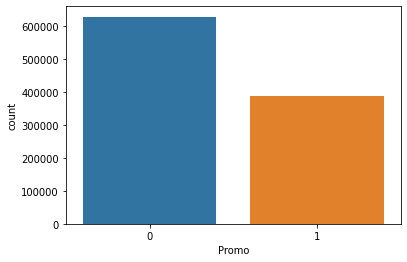

In [ ]:
sns.countplot(data=df3, x='Promo')

#####1. Why did you pick the specific chart?-

 

A countplot is a simple representation of categorical variables. Here Despite having higheraverage sales when promotions were offered, one needs to know what caused the average value to rise. Is it due to higher Sales Revenue or lower instances of occurences?

#####2. What is/are the insight(s) found from the chart?- 



From the above plot, it can be concluded that the instances of sales made when promotions were offered were lesser compared to when promotions weren't offered.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



From the plot, it is profitable for a business whenever the instances of promotions offered are lesser but greater revenue can be generated during this phase. (Higher Numerator and Lower Denominator driving Average value)

####Plot 3- Barplot of Sales and Open(Bivariate Analysis-Categorical and Numerical)

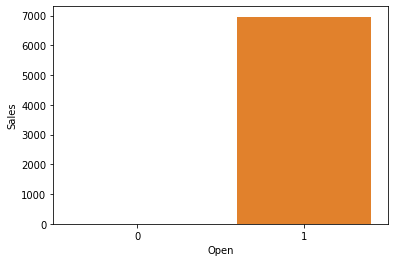

In [ ]:
sns.barplot(data=df3, x='Open', y="Sales")

#####1.Why did you pick the specific chart?



A barplot is a simple representation of categorical variables with a numeric variable.

#####2. What is/are the insight(s) found from the chart?



From the above plot, it can be observed that sales were made only when the store was open

#####3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



Keeping Stores Open and Not Closed will only lead to Sales, unless the Company has an online presence where it can afford to keep it physical stores closed and sell products online.

####Plot 4- Lineplot of Sales and DayOfWeek(Bivariate Analysis-Categorical with Numerical)

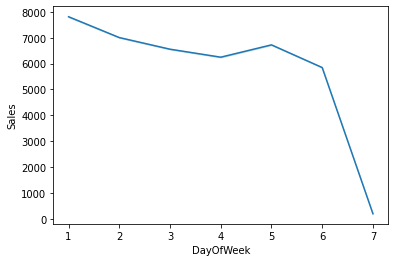

In [ ]:
sns.lineplot(data=df3, x='DayOfWeek', y="Sales")

#####1.Why did you pick the specific chart?





This is a line plot, Here we will obtain on which day the number of sales were highest and how drastically sales changes over the other days.

#####2. What are the insights found from the chart?



Here , We found that the highest number of sales occured on Monday that is the starting day of the week and the sales were slowly decreasing at the end of the week. On Sunday (7th day of the week), Sales have drastically fallen due to a holiday.

#####3.Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.



From the plot,during the starting days of the week like Monday,Tuesday, the sales are higher. But towards the weekends the sales start plummeting.
So Inorder to generate sales, stores could offer promotions on weekends to attract customers.

####Plot 5- Categorical Plot of Sales and DayOfWeek with Promo(when Promotions are offered)(Multivariate Analysis-Categorical and Numerical with Categorical)

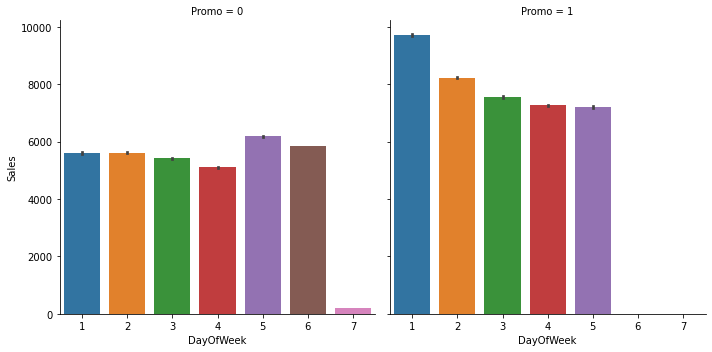

In [ ]:
sns.catplot(data=df3, x='DayOfWeek', y="Sales",kind='bar',col='Promo')

#####1. Why did you pick the specific chart?



A categorical plot is a simple way of representing data when there is a categorical variable and a numeric variable. Here a MultiVariate Analysis is also performed. So it can be easier to understand compared to Line plots that can potentially confuse the viewer.

#####2. What are the insights found from the chart?



Here the average sales were higher when promotions were offered compared to when no promotions were offered. Also on weekends the sales was zero when promotions were offered. This contradictory trend could be due to the fact that no promotions were offered on the products the customers wanted a discount on. 

Despite lower sales,some customers decided to purchase items on Saturday despite having no promotions(could be
an emergency purchase where the customer isn't bothered about the reduced rate)

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.



It is evident that average sales were higher when promotions were offered on weekdays. But the company needs to devise ways to attract customers without promotions too. While it is beneficial for the company in the short run, it would create problems in the long run.

####Plot 6- Categorical Plot of Sales against DayOfWeek with StateHoiday- when state holidays are considered. (Multivariate Analysis- Categorical and Numerical with Categorical)

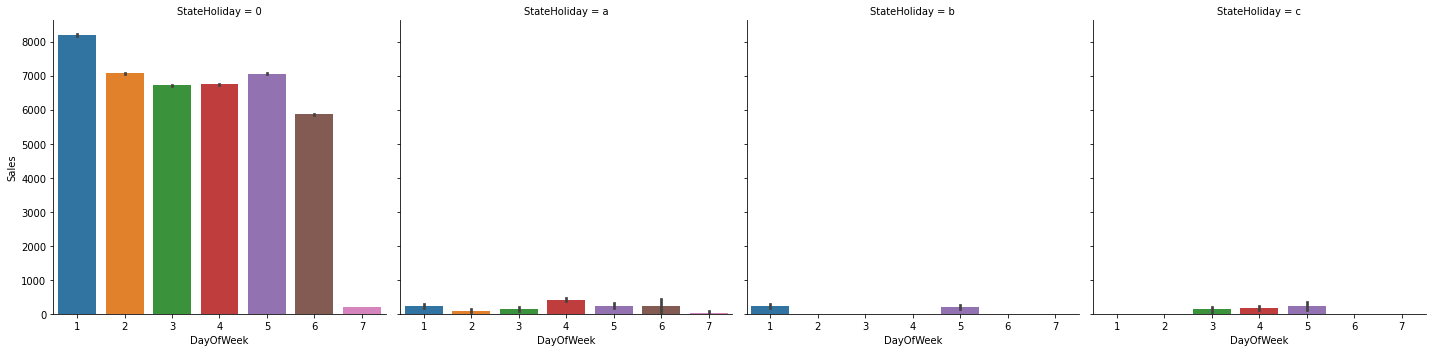

In [ ]:
sns.catplot(data=df3, x='DayOfWeek', y="Sales",kind='bar',col='StateHoliday')

#####1. Why did you pick the specific chart?




A categorical plot is a simple way of representing data when there is a categorical variable and a numeric variable. Here a MultiVariate Analysis is also performed. So it can be easier to understand compared to Line plots that can potentially confuse the viewer.


#####2. What are the insights found from the chart?



It is observed that the average sales were higher when there were no state holidays whichis greatly attributable due to the number of non state holidays. Also, there were lesser very average purchases on days when Easter and Christmas fall. This can be due to the fact that Easter and Christmas fall on certain days for a data of 2 years(2013-2015) compared to days when there are no state holidays and there are public holidays.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.



####Plot 7- Categorical Plot of Sales against DayOfWeek with SchoolHoliday- when school holidays are considered. (Multivariate Analysis-Categorical and Numerical with Categorical)



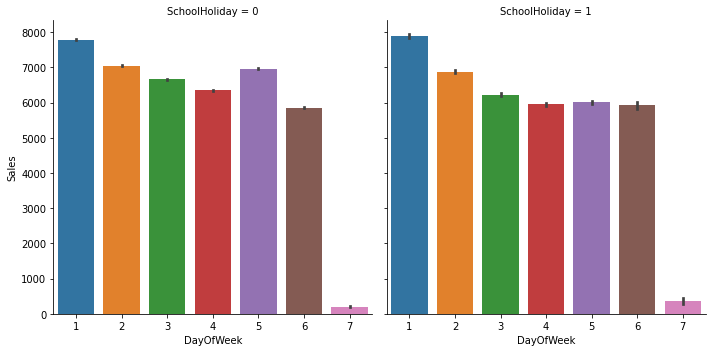

In [ ]:
sns.catplot(data=df3, x='DayOfWeek', y="Sales",kind='bar',col='SchoolHoliday')

#####1. Why did you pick the specific chart?



A categorical plot is a simple way of representing data when there is a categorical variable and a numeric variable. Here a Multivariate Analysis is also performed. So it can be easier to understand compared to Line plots that can potentially confuse the viewer.

#####2. What are the insights found from the chart?





The average sales more or less show a similar value irrespective of school holiday. Which can be good for a store considering the fact that no of school holidays is lesser than the no school holidays.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



If this trend continues, it is good as far as a store is considered since it can maintain a similar average across the number of days irrespective of school holidays.

####Plot 8- Categorical Plot of  StoreType. (Univariate Analysis)



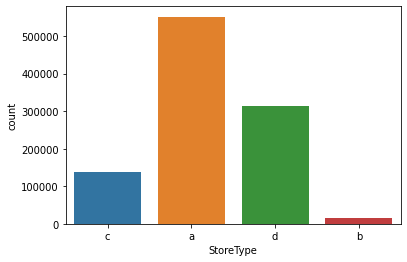

In [ ]:
sns.countplot(df3['StoreType'])

#####1. Why did you pick the specific chart?



A countplot is a simple way of representing data when there is a categorical variable or when a univariate analysis is needed.

#####2. What are the insights found from the chart?



The maximum number of stores are of store type 'a'. The minimum number of stores are of type 'b'

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



Since the number of stores of type a are the maximum and of type b is minimum, the company can devise store specific offers and strategies to drive sales accordingly.

####Plot 9- Categorical Plot of Assortment Type. (Univariate Analysis)



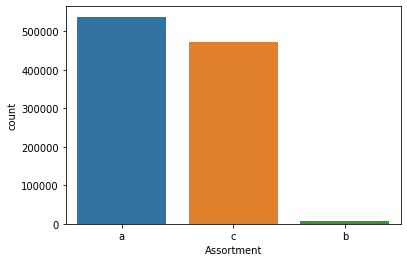

In [ ]:
sns.countplot(df3['Assortment'])

#####1. Why did you pick the specific chart?



A countplot is a simple way of representing data when there is a categorical variable or when a univariate analysis is needed.

#####2. What are the insights found from the chart?



The maximum number of assortments are type 'a'. The minimum number is of type 'b'

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



Since the number of assortments of type a are the maximum and of type b is minimum, the company can devise store specific offers and strategies to drive sales accordingly.

####Plot 10- Categorical Plot of Sales with StoreType and Assortment. (Multivariate Analysis- Categorical and Numerical with Categorical)



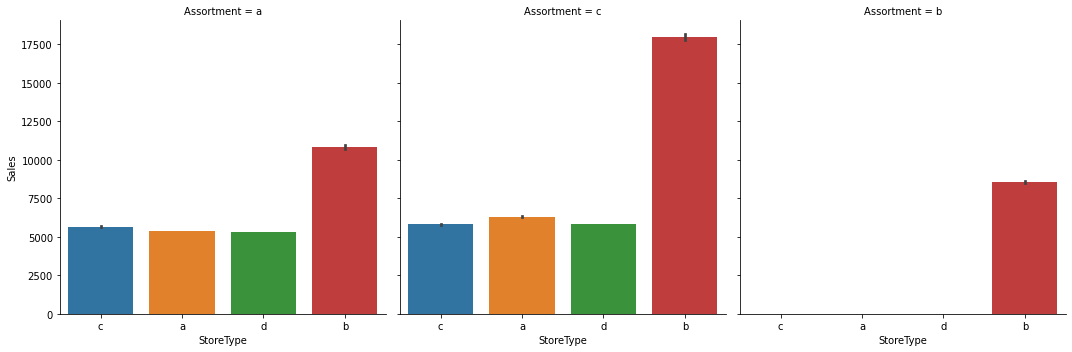

In [ ]:
sns.catplot(data=df3,x='StoreType',y='Sales',col='Assortment',kind='bar')

#####1. Why did you pick the specific chart?



A categorical plot is a simple way of representing data when there is a categorical variable and a numeric variable. Here a MultiVariate Analysis is also performed. So it can be easier to understand compared to Line plots that can potentially confuse the viewer.

#####2. What are the insights found from the chart?



From the previous plots, we saw that lower number of sales were for store type 'b' and assortment for type 'b'. But Despite, the low instances of sales, the average sales for different assortment types were highest for store 'b'. Also when it comes to assortments type 'b' only store type 'b' offered them.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



As far as the company is concerned, store type 'b', performed very well despite less instances of sales. The company could devise strategies to drive sales of assortment type 'b' in other stores as well.

####Plot 11- Barplot of Sales and StoreType with Promo2 - when continued promotions are offered.(Multivariate Analysis- Categorical and Numerical with Categorical)

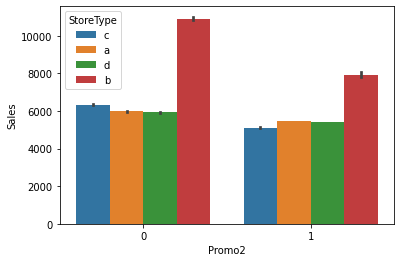

In [ ]:
sns.barplot(data=df3,x='Promo2',y='Sales',hue='StoreType')

#####1. Why did you pick the specific chart?




A categorical plot is a simple way of representing data when there is a categorical variable and a numeric variable. Here a MultiVariate Analysis is also performed. So it can be easier to understand compared to Line plots that can potentially confuse the viewer.


#####2. What are the insights found from the chart?



More Sales were made when continued promotions weren't offered compared to when continued promotions were offered.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



When continued promotions were offered, the instances of sales weren't increasing. This might be beccause, either the product would have lost its appeal when continued promotions are offered in the eyes of the customer(psychological reason).

#####Plots concerning Numeric Variables

####Plot 12- ScatterPlot of Sales and Customers (Bivariate Analysis)

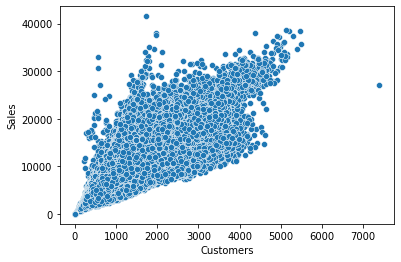

In [ ]:
sns.scatterplot(data=df3,x='Customers',y='Sales')

#####1. Why did you pick the specific chart?



A ScatterPlot is a simple way of performing a bivariate analysis between numeric variables. It is also capable of showing outliers, the nature of correlation.

#####2. What are the insights found from the chart?





Here from the above plot, more sales were made when the customers were high and vice versa. Since the data points are closely packed to each other, it is an indication that customers and sales are strongly correlated.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



As far as a business is concerned, more sales value is generally driven by larger customer footfall. So increasing customer footfall through various offerings, promotions could be key to drive sales as they say 'Customer is King'

####Plot 13- Relative plot of Sales and CompetitionOpenSinceYear For Different StoreType (Multivariate Analysis- Numerical and Numerical with Categorical )

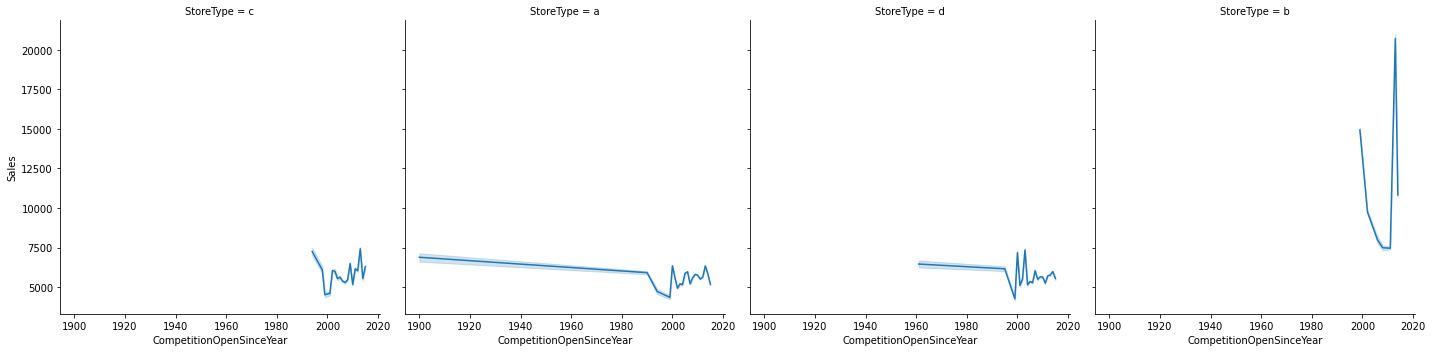

In [ ]:
sns.relplot(
    data=df3, x="CompetitionOpenSinceYear", y="Sales",
    col="StoreType",
    kind="line"
)

#####1. Why did you pick the specific chart?



A relplot is a simple way of understanding a multivariate relationship among numeric variables. Here, subsets of store type are generated as different plots instead of cluttering the original plot of Sales and CompetitionOpenSinceYear. Also, the plot can depict trends and changes.

#####2. What are the insights found from the chart?



Sales were higher for StoreType 'a' when competition wasn't strong(early 1900s- 1940s),then a downward trend is seen,followed by irregularity.
StoreType 'd' has the least variation to competition and StoreType 'b' despite being relativelynewer compared to other StoreTypes is performing much better with Competition.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



Even though StoreType 'b' has a better performance, it is observed that with more number of stores being opened that pose as competition, the sales
doesn't improve much.

Stores can better study their competitors and make unique offerings, have an exclusive partnership with Drug Houses for housing better quality products

####Plot 14- Relative plot of Sales and CompetitionDistance For Different StoreType (Multivariate Analysis- Numerical and Numerical with Categorical)

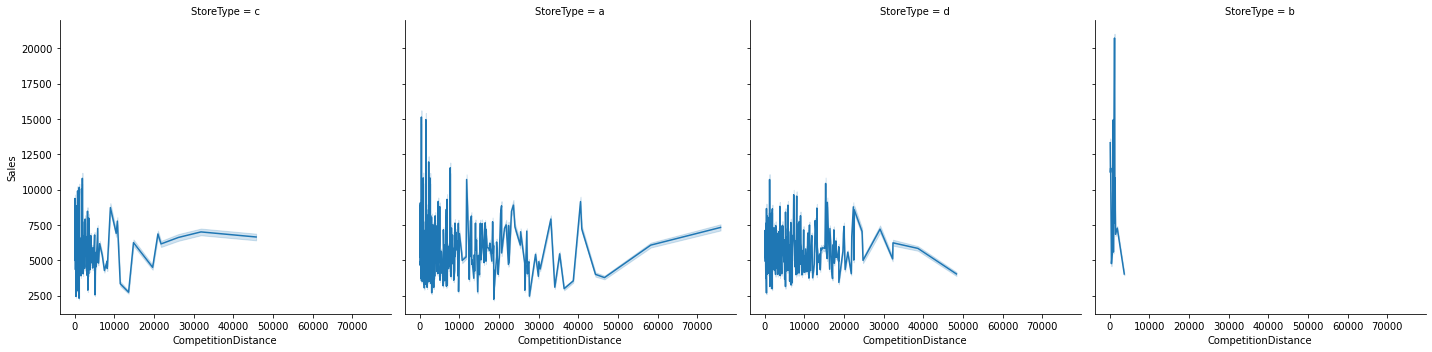

In [ ]:
sns.relplot(
    data=df3, x="CompetitionDistance", y="Sales",
    col="StoreType",
    kind="line"
)

#####1. Why did you pick the specific chart?



A relplot is a simple way of understanding a multivariate relationship among numeric variables. Here, subsets of store type are generated as different plots instead of cluttering the original plot of Sales and CompetitionOpenSinceYear. Also, the plot can depict trends and changes.

#####2. What are the insights found from the chart?



Sales were higher for StoreType 'b' with lesser competition distance.
Store types 'b' and 'd' exhibit declining sales with increasing competition distance compared to Store types 'a' and 'c' that perform relatively better with increasing competition distance.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



Generally Stores perform better as competition distance increases, however, store types 'b' and 'd' exhibit a different trend.

####Plot 15- Distribution Of Assortment within StoreType(Bivariate Analysis- Categorical and Categorical)

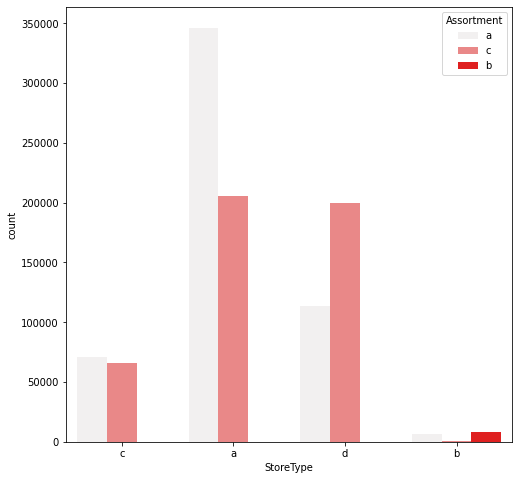

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data=df3,x="StoreType",hue='Assortment',color='red')

#####1. Why did you pick the specific chart?



A countplot is a simple pot to understand the bivariate relationship between categorical variables.

#####2. What are the insights found from the chart?



Assortment Type 'b' isn't found in any StoreType except for 'b'. This could be that Assortment 'b' is an exclusive product for StoreType 'b'

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



Store Specific Offerings need to be studied on a deeper level to generate useful insights.

##***5. Hypothesis Testing***

##***6. Feature Engineering & Data Pre-processing***

###1. Handling Missing Values

In [ ]:
#information of the dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

From the above description, columns CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval have null values.



In [ ]:
df3['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

In [ ]:
df3['Promo2SinceWeek'].isnull().sum()

508031

In [ ]:
df3['Promo2SinceYear'].isnull().sum()

508031

In [ ]:
df3['PromoInterval'].isnull().sum()

508031

Simple visualization Of columns Promo2SinceWeek,Promo2SinceYear andPromoInterval.

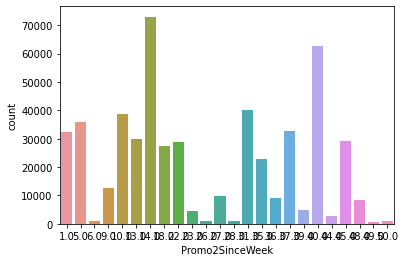

In [ ]:
sns.countplot(df3['Promo2SinceWeek'])

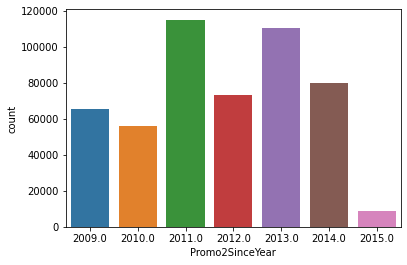

In [ ]:
sns.countplot(df3['Promo2SinceYear'])

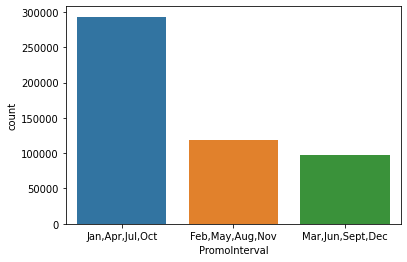

In [ ]:
sns.countplot(df3['PromoInterval'])

Here Promo2SinceWeek, PromoInterval, Promo2SinceYear have close to 50% null values and since the presence of null values in these columns is due to the 0 observation value in Promo2, we can drop the 3 columns. So just keeping Promo2 column would be better for the regression model that is to be modelled.

In [ ]:
df3.drop(columns=['PromoInterval','Promo2SinceYear','Promo2SinceWeek'],inplace=True)

In [ ]:
#checking null values
df3.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
dtype: int64

Since CompetitionDistance has 2642 null values, they were replaced with 0. Assume that the competitor stores and the rossmann stores were adjacent to each other.

In [ ]:
df3['CompetitionDistance'].fillna(0,inplace=True)
df3['CompetitionDistance'].isnull().sum()

0

Treating Null Values For CompetitionOpenSinceMonth,  CompetitionOpenSinceYear

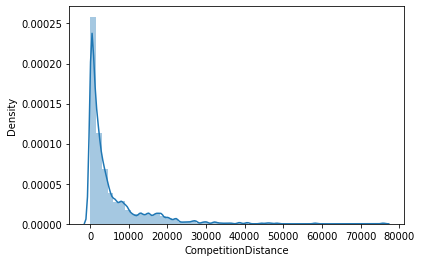

In [ ]:
#visualizing CompetitionDistance
sns.distplot(df3['CompetitionDistance'])

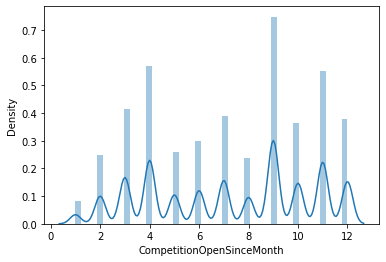

In [ ]:
#visualizing CompetitionOpenSinceMonth
sns.distplot(df3['CompetitionOpenSinceMonth'])

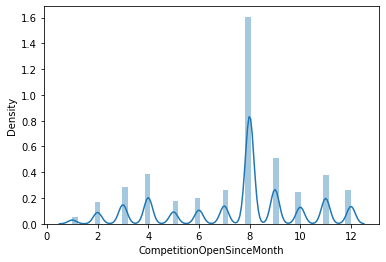

In [ ]:
#Treating Null Values with Median
df3['CompetitionOpenSinceMonth']=df3['CompetitionOpenSinceMonth'].fillna(df3['CompetitionOpenSinceMonth'].median())
sns.distplot(df3['CompetitionOpenSinceMonth'])


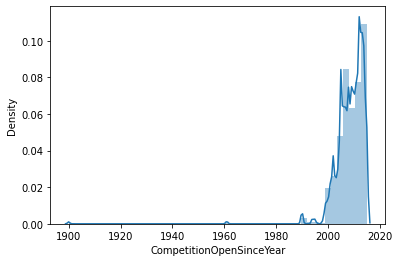

In [ ]:
#visualizing CompetitionOpenSinceYear
sns.distplot(df3['CompetitionOpenSinceYear'])

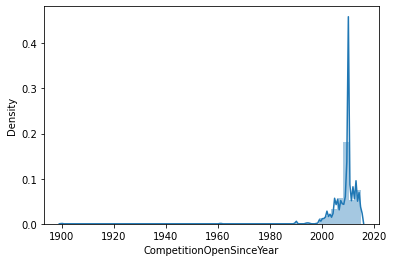

In [ ]:
#Treating Null Values with Median
df3['CompetitionOpenSinceYear']=df3['CompetitionOpenSinceYear'].fillna(df3['CompetitionOpenSinceYear'].median())
sns.distplot(df3['CompetitionOpenSinceYear'])

In [ ]:
#checking for null values
df3.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

The null values have been treated.

####What all missing value imputation techniques have you used and why did you use those techniques?

###2. Handling Outliers

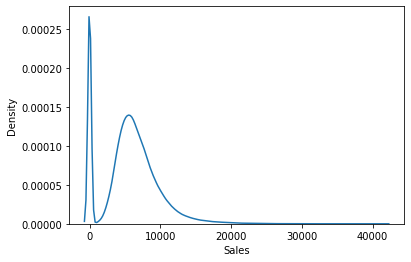

In [ ]:
#visualisation of sales column
sns.kdeplot(data=df3, x="Sales")

In [ ]:
df3['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

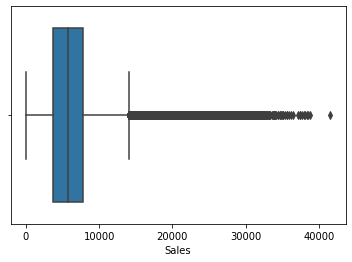

In [ ]:
sns.boxplot(df3['Sales'])

It could be observed that a lot of stores have sales as zero. This was due to the fact that the stores were closed for refurbishment. So it is best to remove these stores with zero sales.

In [ ]:
df3=df3[df3['Sales']!=0]
#Removing Sales Values of Zero from the Dataframe

In [ ]:
df3.shape

(844338, 15)

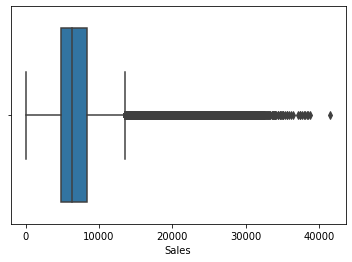

In [ ]:
sns.boxplot(df3['Sales'])

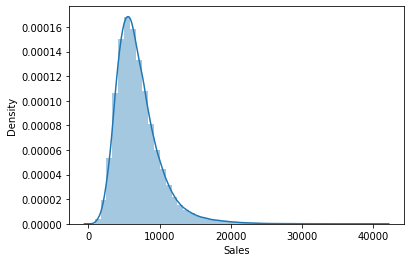

In [ ]:
sns.distplot(df3['Sales'])

In [ ]:
df3['Sales'].describe()


count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [ ]:
iqr=df3['Sales'].quantile(0.75)-df3['Sales'].quantile(0.25)
#Moderately skewed boundary points
lower_bridge=df3['Sales'].quantile(0.25)-iqr*1.5
upper_bridge=df3['Sales'].quantile(0.75)+iqr*1.5
print(lower_bridge,upper_bridge)
#Extremely skewed boundary points
lower_extreme=df3['Sales'].quantile(0.25)-iqr*3
upper_extreme=df3['Sales'].quantile(0.75)+iqr*3
print(lower_extreme,upper_extreme)

-392.5 13611.5
-5644.0 18863.0


CompetitionOpenSinceYear Outlier Analysis

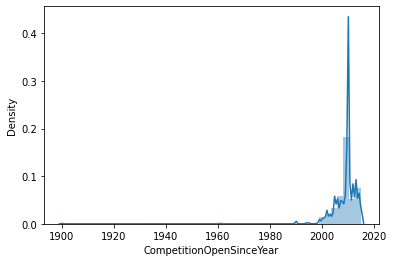

In [ ]:
sns.distplot(df3['CompetitionOpenSinceYear'])

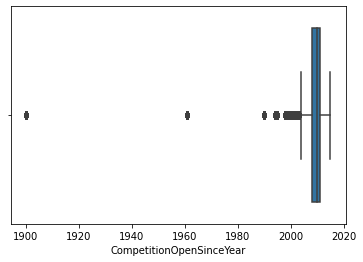

In [ ]:
sns.boxplot(df3['CompetitionOpenSinceYear'])

In [ ]:
df3['CompetitionOpenSinceYear'].describe()

count    844338.000000
mean       2009.112023
std           4.973570
min        1900.000000
25%        2008.000000
50%        2010.000000
75%        2011.000000
max        2015.000000
Name: CompetitionOpenSinceYear, dtype: float64

CompetitionOpenSinceMonth Outlier Analysis

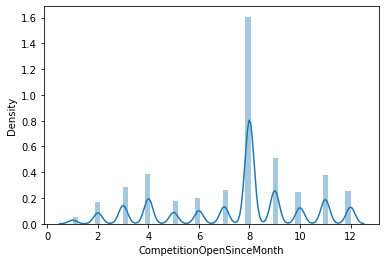

In [ ]:
sns.distplot(df3['CompetitionOpenSinceMonth'])

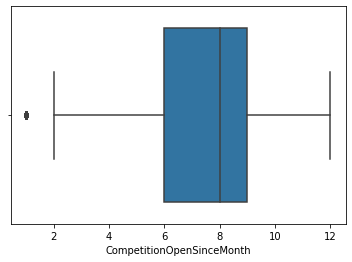

In [ ]:
sns.boxplot(df3['CompetitionOpenSinceMonth'])

###3. Categorical Encoding

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Open                       844338 non-null  int64  
 6   Promo                      844338 non-null  int64  
 7   StateHoliday               844338 non-null  object 
 8   SchoolHoliday              844338 non-null  int64  
 9   StoreType                  844338 non-null  object 
 10  Assortment                 844338 non-null  object 
 11  CompetitionDistance        844338 non-null  float64
 12  CompetitionOpenSinceMonth  844338 non-null  float64
 13  CompetitionOpenSinceYear   8

In [ ]:
#Label Encoding with replace
replacewith_nums = {"DayOfWeek": {1: 0, 2: 0, 3: 0, 4: 0,
                                  5: 0, 6: 1, 7:1 },
                    "StateHoliday":{'0':0,'a':1,'b':2,'c':3},
                    "Assortment":{'a':0,'b':1,'c':2},
                    "StoreType":{'a':0,'b':1,'c':2,'d':3}}
df3 = df3.select_dtypes(include=['int','object','float64'])
df3 = df3.replace(replacewith_nums)
df3.head()                          

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,0,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0
1,2,0,2015-07-31,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1
2,3,0,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1
3,4,0,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0
4,5,0,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0


####Why Label Encoding was used?

In [ ]:
!pip install category_encoders
import category_encoders as ce


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.3 MB/s eta 0:00:00


In [ ]:
#Applying Base Encoding- More Efficient than binary encoding
encoder= ce.BaseNEncoder(cols=['CompetitionOpenSinceMonth'],return_df=True,base=7)
df3 = encoder.fit_transform(df3)

In [ ]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth_0,CompetitionOpenSinceMonth_1,CompetitionOpenSinceYear,Promo2
0,1,0,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,0,1,2008.0,0
1,2,0,2015-07-31,6064,625,1,1,0,1,0,0,570.0,0,2,2007.0,1
2,3,0,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,0,3,2006.0,1
3,4,0,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,0,1,2009.0,0
4,5,0,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,0,4,2015.0,0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Store                        844338 non-null  int64  
 1   DayOfWeek                    844338 non-null  int64  
 2   Date                         844338 non-null  object 
 3   Sales                        844338 non-null  int64  
 4   Customers                    844338 non-null  int64  
 5   Open                         844338 non-null  int64  
 6   Promo                        844338 non-null  int64  
 7   StateHoliday                 844338 non-null  int64  
 8   SchoolHoliday                844338 non-null  int64  
 9   StoreType                    844338 non-null  int64  
 10  Assortment                   844338 non-null  int64  
 11  CompetitionDistance          844338 non-null  float64
 12  CompetitionOpenSinceMonth_0  844338 non-null  int64  
 13

####What all categorical encoding techniques have you used & why did you use those techniques?

###4. Textual Data Preprocessing



Not using in this project

###5. Feature Manipulation & Selection

####1. Feature Manipulation

In [ ]:
#Creating Day, Month, Week, Year features from Date feature
# using dt accessor to extract day               
df3['Date']= pd.to_datetime(df3['Date'])
df3['Month']=df3['Date'].dt.month
df3['Year']=df3['Date'].dt.year
df3['Week']=df3['Date'].dt.week
df3.drop(columns='Date',inplace=True,axis=1)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Store                        844338 non-null  int64  
 1   DayOfWeek                    844338 non-null  int64  
 2   Sales                        844338 non-null  int64  
 3   Customers                    844338 non-null  int64  
 4   Open                         844338 non-null  int64  
 5   Promo                        844338 non-null  int64  
 6   StateHoliday                 844338 non-null  int64  
 7   SchoolHoliday                844338 non-null  int64  
 8   StoreType                    844338 non-null  int64  
 9   Assortment                   844338 non-null  int64  
 10  CompetitionDistance          844338 non-null  float64
 11  CompetitionOpenSinceMonth_0  844338 non-null  int64  
 12  CompetitionOpenSinceMonth_1  844338 non-null  int64  
 13

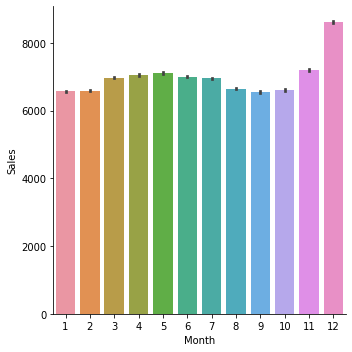

In [ ]:
sns.catplot(data=df3,x='Month',y='Sales',kind='bar')

The mean sales was maximum on December.

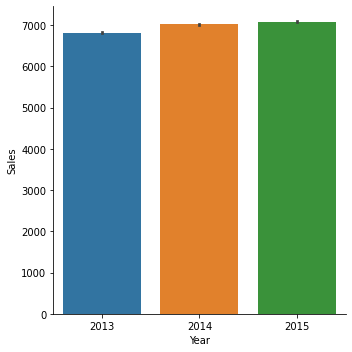

In [ ]:
sns.catplot(data=df3,x='Year',y='Sales',kind='bar')

The mean sales were maximum in 2015 and minimum in 2013.



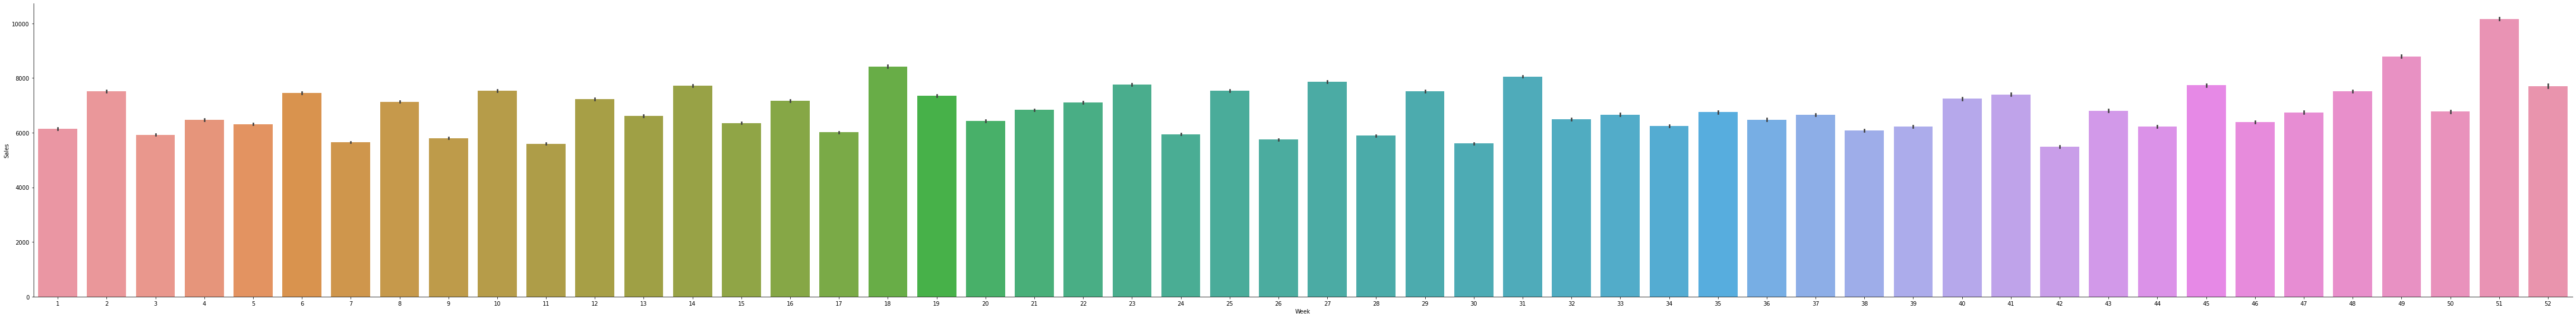

In [ ]:
sns.catplot(data=df3,x='Week',y='Sales',kind='bar',height=8,aspect=8)

The maximum mean sales were in week 51 and min mean sales in week 41.

In [ ]:
#Performing BaseN Encoding on Month Column.
encoder= ce.BaseNEncoder(cols=['Month'],return_df=True,base=7)
df3 = encoder.fit_transform(df3)

In [ ]:
df3.head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth_0,CompetitionOpenSinceMonth_1,CompetitionOpenSinceYear,Promo2,Month_0,Month_1,Year,Week
0,1,0,5263,555,1,1,0,1,2,0,1270.0,0,1,2008.0,0,0,1,2015,31
1,2,0,6064,625,1,1,0,1,0,0,570.0,0,2,2007.0,1,0,1,2015,31


Created Some new features like Week,Month,Year and dropped Date and Week feature

In [ ]:
#Dropping thw week column
df3.drop(columns='Week',axis=1,inplace=True)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Store                        844338 non-null  int64  
 1   DayOfWeek                    844338 non-null  int64  
 2   Sales                        844338 non-null  int64  
 3   Customers                    844338 non-null  int64  
 4   Open                         844338 non-null  int64  
 5   Promo                        844338 non-null  int64  
 6   StateHoliday                 844338 non-null  int64  
 7   SchoolHoliday                844338 non-null  int64  
 8   StoreType                    844338 non-null  int64  
 9   Assortment                   844338 non-null  int64  
 10  CompetitionDistance          844338 non-null  float64
 11  CompetitionOpenSinceMonth_0  844338 non-null  int64  
 12  CompetitionOpenSinceMonth_1  844338 non-null  int64  
 13

####2. Feature Selection

In [ ]:
# Checking the shape of dataset
df3.shape

(844338, 18)

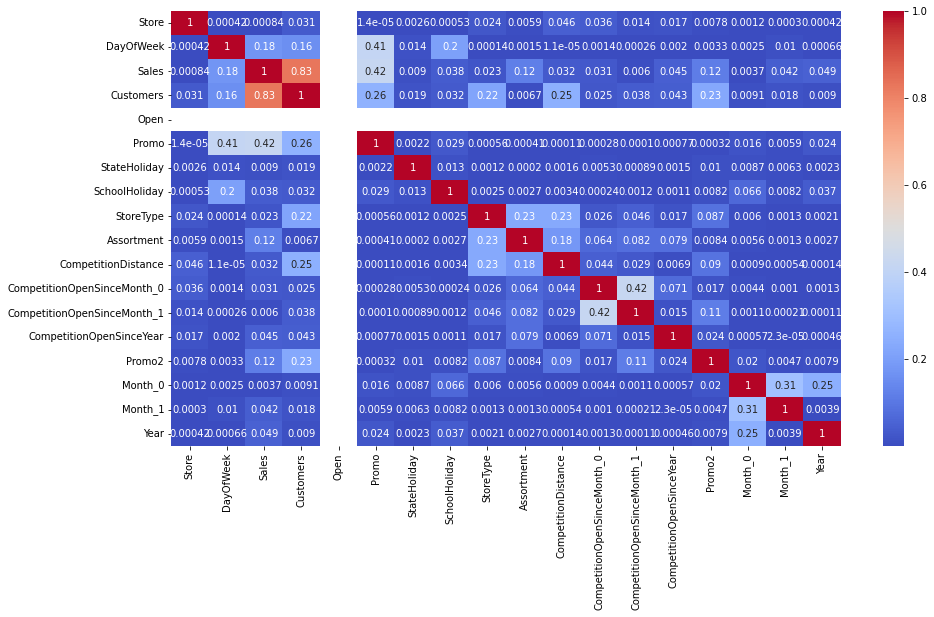

In [ ]:
#Generating Heatmap for the Independent Features
df10=df3.copy()
plt.figure(figsize=(15,8))
correlation = df10.corr(method='spearman')
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

####Detecting MultiCollinearity and Removal Of Features

In [ ]:
#Reordering the Columns
df3=df3[['Store','DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceYear','Promo2','Month_0','Month_1','CompetitionOpenSinceMonth_0','CompetitionOpenSinceMonth_1','Year','Sales']]


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Store                        844338 non-null  int64  
 1   DayOfWeek                    844338 non-null  int64  
 2   Customers                    844338 non-null  int64  
 3   Open                         844338 non-null  int64  
 4   Promo                        844338 non-null  int64  
 5   StateHoliday                 844338 non-null  int64  
 6   SchoolHoliday                844338 non-null  int64  
 7   StoreType                    844338 non-null  int64  
 8   Assortment                   844338 non-null  int64  
 9   CompetitionDistance          844338 non-null  float64
 10  CompetitionOpenSinceYear     844338 non-null  float64
 11  Promo2                       844338 non-null  int64  
 12  Month_0                      844338 non-null  int64  
 13

Variance Inflation Factor

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
df4=df3.iloc[:,:-1]

X = df4[list(df4.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,7.438922e+06,Open
1,1.262764e+00,DayOfWeek
4,1.246748e+00,Promo
12,1.212088e+00,Month_0
15,1.209017e+00,CompetitionOpenSinceMonth_1
14,1.195669e+00,CompetitionOpenSinceMonth_0
2,1.166894e+00,Customers
13,1.126113e+00,Month_1
7,1.106868e+00,StoreType
11,1.105835e+00,Promo2


In [ ]:
df4.drop(columns='Open',axis=1,inplace=True)
#Dropping Columns since it has a high multicollinearity (VIF)

In [ ]:
X = df4[list(df4.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
9,161061.572128,CompetitionOpenSinceYear
15,160945.877925,Year
2,5.384754,Customers
14,5.095253,CompetitionOpenSinceMonth_1
12,4.045658,Month_1
0,4.025937,Store
3,2.250986,Promo
10,2.204839,Promo2
7,2.062909,Assortment
6,1.972142,StoreType


In [ ]:
df4.drop(columns=['CompetitionOpenSinceYear'],axis=1,inplace=True)
#Dropping Columns since it has a high multicollinearity (VIF)

In [ ]:
X = df4[list(df4.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
14,23.077873,Year
2,5.384740,Customers
13,5.086596,CompetitionOpenSinceMonth_1
11,4.044796,Month_1
0,4.025912,Store
3,2.250967,Promo
9,2.198705,Promo2
7,2.056601,Assortment
6,1.971544,StoreType
10,1.907191,Month_0


In [ ]:
df4.drop(columns=['Year'],axis=1,inplace=True)
#Dropping Columns since it has a high multicollinearity (VIF)

In [ ]:
X = df4[list(df4.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
13,4.225999,CompetitionOpenSinceMonth_1
2,4.204912,Customers
0,3.538383,Store
11,3.327999,Month_1
3,2.177082,Promo
9,2.052118,Promo2
7,2.041949,Assortment
6,1.886004,StoreType
10,1.739676,Month_0
8,1.532334,CompetitionDistance


####What all feature selection methods have you used and why?

####Which all features you found important and why?

###6. Data Transformation

In [ ]:
#Adding back sales column
df6=df3['Sales']
df4=pd.concat([df4,df6],axis=1)


Outlier Observations were done in Outlier Analysis, here the distribution of features are observed and then data is transformed accordingly followed by removal of outliers if it is significant.

###Distribution Of Target Feature- Sales

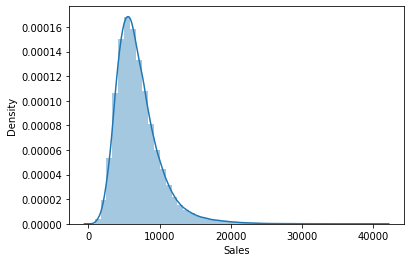

In [ ]:
sns.distplot(df4['Sales'])
# Still the data is moderately skewed. So we apply some transformations to the Sales column.

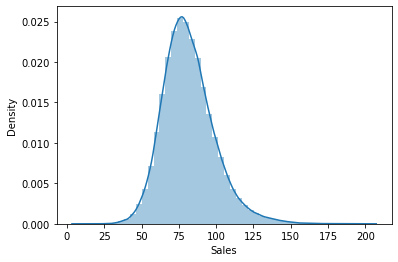

In [ ]:
#Applying Square Root Transformation to the Sales feature for moderate skew
df4['Sales']=np.sqrt(df4['Sales'])
sns.distplot(df4['Sales'])

Now the distribution Obtained is almost Normal, which is very important for a regression based model.

In [ ]:
df4['Sales'].describe()

count    844338.000000
mean         81.554005
std          17.461492
min           6.782330
25%          69.706528
50%          79.806015
75%          91.433036
max         203.840624
Name: Sales, dtype: float64

In [ ]:
iqr=df4['Sales'].quantile(0.75)-df4['Sales'].quantile(0.25)
#Lower Fence boundary points
lower_bridge=df4['Sales'].quantile(0.25)-iqr*1.5
upper_bridge=df4['Sales'].quantile(0.75)+iqr*1.5
print(lower_bridge,upper_bridge)
#Outer Fence boundary points
lower_extreme=df4['Sales'].quantile(0.25)-iqr*3
upper_extreme=df4['Sales'].quantile(0.75)+iqr*3
print(lower_extreme,upper_extreme)

37.11676577048496 124.02279750618851
4.527003869596129 156.61255940707736


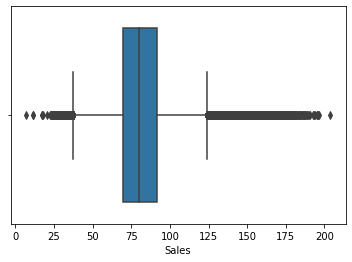

In [ ]:
sns.boxplot(df4['Sales'])

We will check the number of outliers that exceed the outer fence points. After transformation, it is observed that there are some outliers excceding the right outer fence boundary points.

In [ ]:
len(df4.loc[df4['Sales']>156])/len(df4['Sales'])

0.0011038233503644274

Since only 0.1% of the sales data are outliers, there is no need for their removal and also in reality, extremely high sales could be made.

In [ ]:
'''#Capping the outliers using moderately skewed boundaries
df4.loc[df4['Sales']<37.11,'Sales']=37.11
df4.loc[df4['Sales']>124,'Sales']=124
sns.boxplot(df4['Sales'])'''

"#Capping the outliers using moderately skewed boundaries\ndf4.loc[df4['Sales']<37.11,'Sales']=37.11\ndf4.loc[df4['Sales']>124,'Sales']=124\nsns.boxplot(df4['Sales'])"

####Distribution of Customers Feature

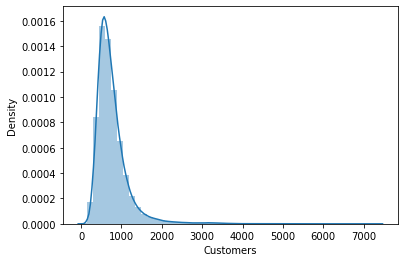

In [ ]:
sns.distplot(df4['Customers'])
#the distribution shows moderate skewness

The data appears to be moderately skewed. So applying Square Root Transformation.

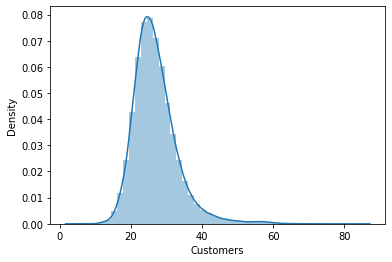

In [ ]:
#Applying square root transformation for moderately skewed data
df4['Customers']=np.sqrt(df4['Customers'])
sns.distplot(df4['Customers'])

Now an almost normal distribution is obtained, which is great for the model to learn from in regression

In [ ]:
df4['Customers'].describe()

count    844338.000000
mean         26.892133
std           6.292088
min           2.828427
25%          22.781571
50%          26.000000
75%          29.883106
max          85.953476
Name: Customers, dtype: float64

checking for outliers after transformation

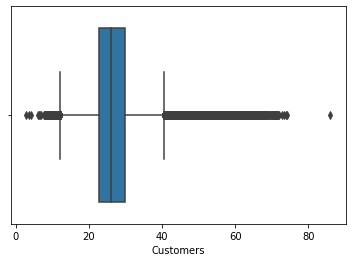

In [ ]:
sns.boxplot(df4['Customers'])
#The Customers feature has a lot of outliers.

In [ ]:
iqr=df4['Customers'].quantile(0.75)-df4['Customers'].quantile(0.25)
#Lower Fence boundary points
lower_bridge=df4['Customers'].quantile(0.25)-iqr*1.5
upper_bridge=df4['Customers'].quantile(0.75)+iqr*1.5
print(lower_bridge,upper_bridge)
#Outer Fence boundary points
lower_extreme=df4['Customers'].quantile(0.25)-iqr*3
upper_extreme=df4['Customers'].quantile(0.75)+iqr*3
print(lower_extreme,upper_extreme)

12.129270357020783 40.535406737736125
1.4769692142525308 51.18770788050438


We will check the number of outliers that exceed the outer fence points. After transformation, it is observed that there are some outliers excceding the right outer fence boundary points.

In [ ]:
len(df4.loc[df4['Customers']>51.18])/len(df4['Customers'])

0.0077954563219942725

Since only 0.7% of the sales data are outliers, there is no need for their removal and also in reality, a lot of customers can come to the store to make purchases.

In [ ]:
'''#Capping the outliers using moderate boundaries
df4.loc[df4['Customers']<12.12,'Customers']=12
df4.loc[df4['Customers']>40.53,'Customers']=41
sns.boxplot(df4['Customers'])'''

"#Capping the outliers using moderate boundaries\ndf4.loc[df4['Customers']<12.12,'Customers']=12\ndf4.loc[df4['Customers']>40.53,'Customers']=41\nsns.boxplot(df4['Customers'])"

###Distribution Of CompetitionDistance 

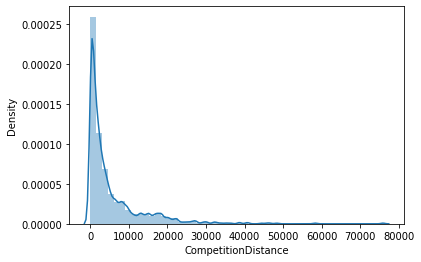

In [ ]:
sns.distplot(df4['CompetitionDistance'])

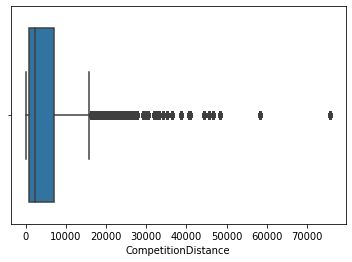

In [ ]:
sns.boxplot(df4['CompetitionDistance'])

Data Appears to be highly skewed, so we apply logarithmic transformation.

In [ ]:
#transformation
df4['CompetitionDistance']=np.log(df4['CompetitionDistance'])


OverflowError: ignored

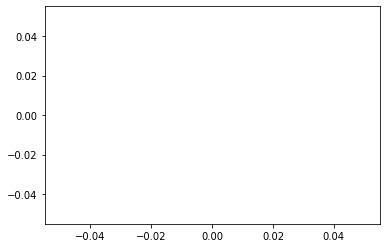

In [ ]:
sns.distplot(df4['CompetitionDistance'])

####Since we get an error message, we have to remove the float infinity values.So after removal, we plot the distplot for competition distance.

In [ ]:
# Replace infinite updated data with nan
df4.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df4.dropna(inplace=True)

In [ ]:
df4.shape

(842152, 15)

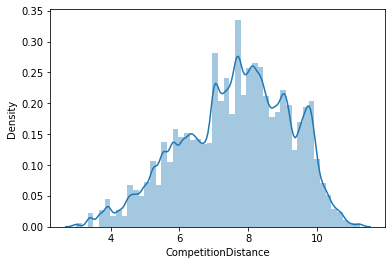

In [ ]:
sns.distplot(df4['CompetitionDistance'])

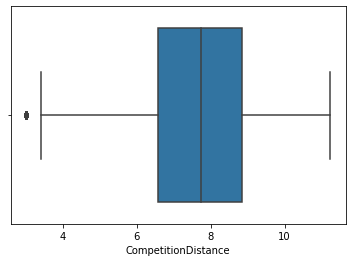

In [ ]:
sns.boxplot(df4['CompetitionDistance'])

Although the distribution obtained isn't approximately normal, the outliers were considerably reduced thereby not requiring the need for outlier treatment

###7. Data Scaling

In [ ]:
df4.describe()

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Month_0,Month_1,CompetitionOpenSinceMonth_0,CompetitionOpenSinceMonth_1,Sales
count,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000
mean,558.373097,0.174872,26.902419,0.446352,0.001418,0.193593,1.203576,0.937062,7.642964,0.499226,0.412379,2.988863,0.254061,3.778678,81.578242
std,321.921616,0.379858,6.291410,0.497114,0.047602,0.395114,1.362680,0.993123,1.562959,0.500000,0.492263,1.844442,0.435332,2.110482,17.457829
min,1.000000,0.000000,2.828427,0.000000,0.000000,0.000000,0.000000,0.000000,2.995732,0.000000,0.000000,0.000000,0.000000,0.000000,6.782330
25%,280.000000,0.000000,22.803509,0.000000,0.000000,0.000000,0.000000,0.000000,6.565265,0.000000,0.000000,1.000000,0.000000,2.000000,69.742383
50%,557.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.749322,0.000000,0.000000,3.000000,0.000000,4.000000,79.831072
75%,837.000000,0.000000,29.883106,1.000000,0.000000,0.000000,3.000000,2.000000,8.837826,1.000000,1.000000,5.000000,1.000000,6.000000,91.449440
max,1115.000000,1.000000,85.953476,1.000000,3.000000,1.000000,3.000000,2.000000,11.236645,1.000000,1.000000,6.000000,1.000000,6.000000,203.840624


####Which method have you used to scale you data and why ?


When you are using an algorithm that assumes your features have a similar range, you should use feature scaling.

If the ranges of your features differ much then you should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then you can leave them as it's. However, you should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Use Standardization when your data follows Gaussian distribution. Use Normalization when your data does not follow Gaussian distribution.

So, in my data only the Customers column is having large data difference and is not following gaussian distribution. That's why, I have used normalization technique



In [ ]:
df4.shape

(842152, 15)

In [ ]:
# Normalizing the required column
df4['Customers'] = (df4['Customers']-df4['Customers'].min())/(df4['Customers'].max()-df4['Customers'].min())
df4['Customers']

0          0.249383
1          0.266726
2          0.310673
3          0.431586
4          0.250403
             ...   
1016776    0.252178
1016827    0.552494
1016863    0.390961
1017042    0.353745
1017190    0.416901
Name: Customers, Length: 842152, dtype: float64

In [ ]:
df4.describe()

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Month_0,Month_1,CompetitionOpenSinceMonth_0,CompetitionOpenSinceMonth_1,Sales
count,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000
mean,558.373097,0.174872,0.289612,0.446352,0.001418,0.193593,1.203576,0.937062,7.642964,0.499226,0.412379,2.988863,0.254061,3.778678,81.578242
std,321.921616,0.379858,0.075686,0.497114,0.047602,0.395114,1.362680,0.993123,1.562959,0.500000,0.492263,1.844442,0.435332,2.110482,17.457829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.995732,0.000000,0.000000,0.000000,0.000000,0.000000,6.782330
25%,280.000000,0.000000,0.240302,0.000000,0.000000,0.000000,0.000000,0.000000,6.565265,0.000000,0.000000,1.000000,0.000000,2.000000,69.742383
50%,557.000000,0.000000,0.278756,0.000000,0.000000,0.000000,0.000000,0.000000,7.749322,0.000000,0.000000,3.000000,0.000000,4.000000,79.831072
75%,837.000000,0.000000,0.325470,1.000000,0.000000,0.000000,3.000000,2.000000,8.837826,1.000000,1.000000,5.000000,1.000000,6.000000,91.449440
max,1115.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000,11.236645,1.000000,1.000000,6.000000,1.000000,6.000000,203.840624


###8. Dimesionality Reduction

Dimensionality Reduction isn't needed in this case, as the dataset doesn't suffer from the curse of multidimensionality and necessary encoding techniques have been performed on the categorical features.

###9. Data Splitting

Before going into splitting the dataset for regression modelling, we have to check why regression is the way forward.

So we deal with the basic assumptions of regression.

1.Linearity

Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable

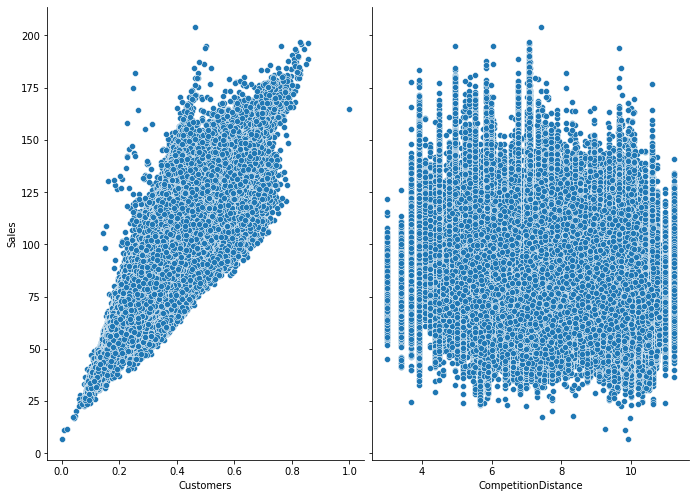

In [ ]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(df4, x_vars=['Customers','CompetitionDistance'], y_vars='Sales', size=7, aspect=0.7)


By looking at the plots we can see that with the Sales variable the none of the independent variables form an accurately linear shape except for customers. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

Now rest of the assumptions require us to perform the regression before we can even check for them. So let's perform regression on it.

###Performing Train Test Split for Regression

In [ ]:
df4.columns

Index(['Store', 'DayOfWeek', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'Month_0', 'Month_1', 'CompetitionOpenSinceMonth_0',
       'CompetitionOpenSinceMonth_1', 'Sales'],
      dtype='object')

In [ ]:
#Splitting the model into x and y
x=df4.iloc[:,:-1]
y=df4['Sales']

In [ ]:
x.shape

(842152, 14)

In [ ]:
y.shape

(842152,)

In [ ]:
#Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

What data splitting ratio have you used and why?

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 80:20 ratio.

##**7. ML Model Implementation**

### ML Model - 1 - **Implementing Linear Regression**

In [ ]:
#creating a function that computes the various metrics
from sklearn import metrics
#Evaluate Metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    Adj_r2 = 1 - (1-r2_square) * (len(true)-1)/(len(true)-X.shape[1]-1)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('Adjusted R2 Square',Adj_r2)
    print('__________________________________')

In [ ]:
#For Linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Store,-0.000844
DayOfWeek,1.356578
Customers,203.812125
Promo,7.417445
StateHoliday,-7.018200
SchoolHoliday,0.747613
StoreType,1.681675
Assortment,0.909833
CompetitionDistance,1.654001
Promo2,2.406284


In [ ]:
#pred = lin_reg.predict(X_test)

In [ ]:
#Evaluation Metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 5.599513613303392
MSE: 57.660407598335176
RMSE: 7.593445041503571
R2 Square 0.8111035852302224
Adjusted R2 Square 0.8110878827446701
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.604168190416859
MSE: 57.690311108367
RMSE: 7.595413820745187
R2 Square 0.8106383104057335
Adjusted R2 Square 0.8106343753603957
__________________________________


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

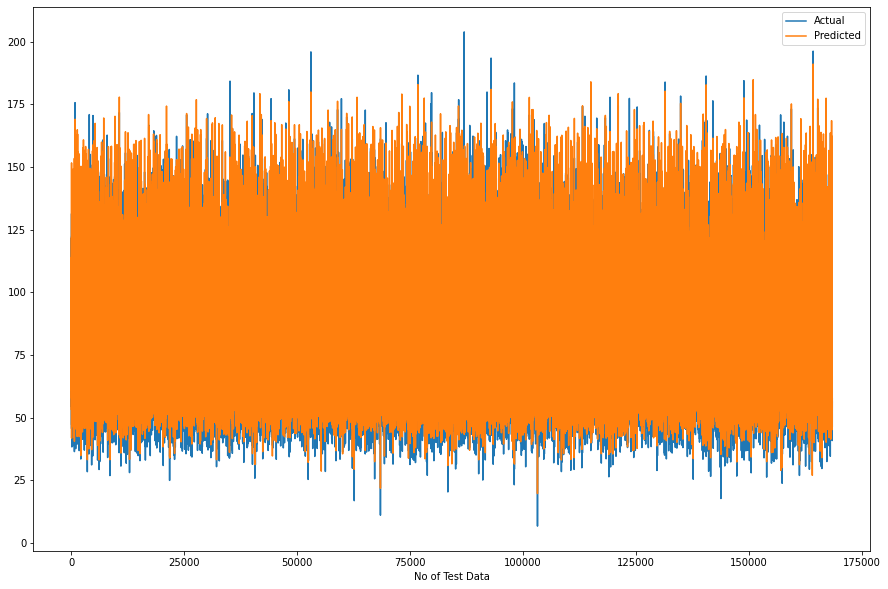

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

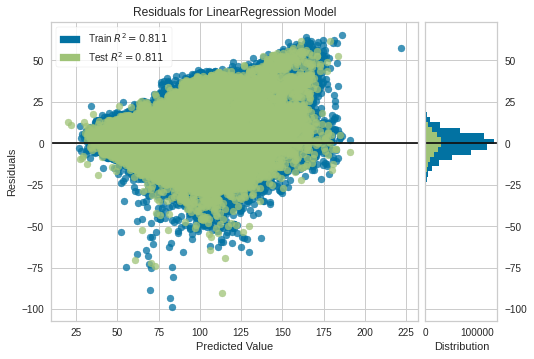

In [ ]:
# Importing ResidualsPlot visualizer
from yellowbrick.regressor import ResidualsPlot

# Importing the Linear Regression model
#from sklearn.linear_model import LinearRegression

# Creating the Residuals Plot
visualizer = ResidualsPlot(lin_reg, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

In [ ]:
#Prediction Error Plot
from yellowbrick.regressor import PredictionError
predictor = PredictionError(lin_reg)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

2) Mean of Residuals

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [ ]:
#Finding mean of Residuals
residuals = y_train.values-train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -2.5595910940396747e-14


The mean of residuals is negative and a very small number that is close to zero, thereby not violating this assumption

3)Check for Normality of error terms/residuals


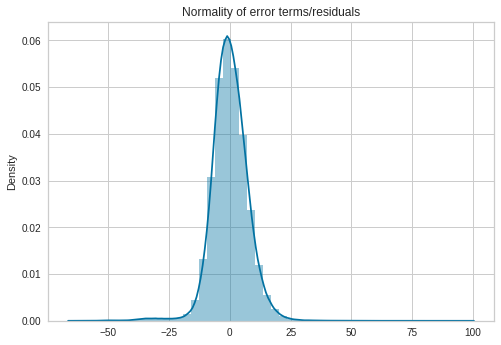

In [ ]:
#Distplot for Normality of error terms/residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

####2. Cross Validation and Hyperparameter Tuning

In [ ]:
#CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5



cv_result = cross_val_score(lin_reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.79152597 0.81627861 0.81099229 0.81152697 0.80641858]
CV scores average:  0.8073484852137021


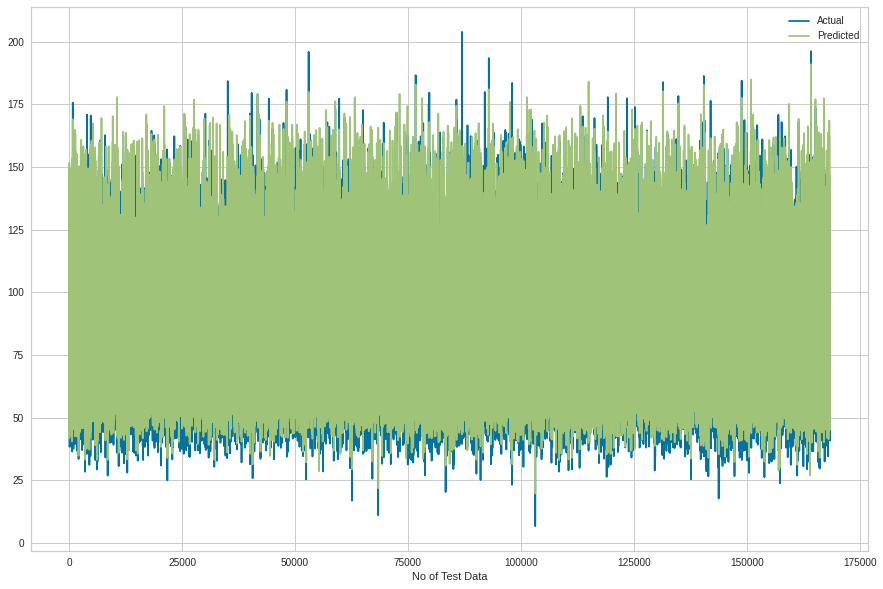

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

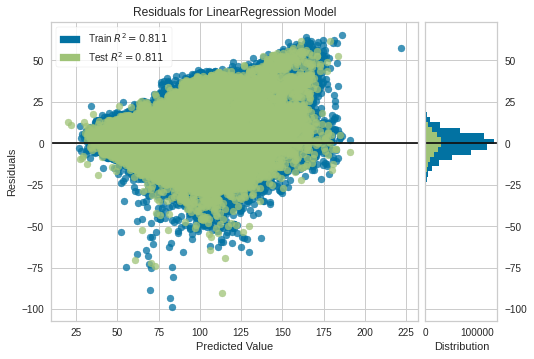

In [ ]:
# Importing ResidualsPlot visualizer
from yellowbrick.regressor import ResidualsPlot

# Importing the Linear Regression model
#from sklearn.linear_model import LinearRegression

# Creating the Residuals Plot
visualizer = ResidualsPlot(reg, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

In [ ]:
#Prediction Error Plot
from yellowbrick.regressor import PredictionError
predictor = PredictionError(reg)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

###ML Model - 2 - **Implementing Lasso Regression**

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001, tol=0.0001, random_state=42)
lasso.fit(X_train, y_train)

test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 5.600629291464235
MSE: 57.65873665137431
RMSE: 7.5933350150888455
R2 Square 0.8111090592791119
Adjusted R2 Square 0.8110933572486035
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.605352880538929
MSE: 57.69106631732143
RMSE: 7.59546353538225
R2 Square 0.8106358315207898
Adjusted R2 Square 0.8106318964239394
__________________________________


###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

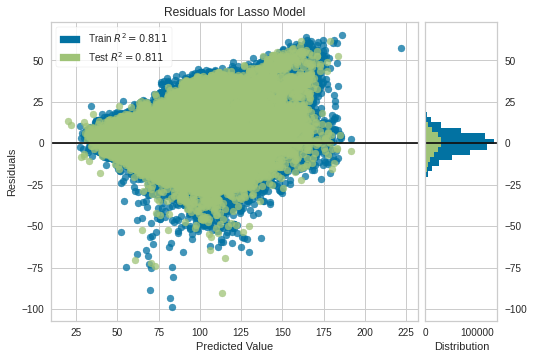

In [ ]:
# Importing ResidualsPlot visualizer
from yellowbrick.regressor import ResidualsPlot

# Importing the Linear Regression model
#from sklearn.linear_model import LinearRegression

# Creating the Residuals Plot
visualizer = ResidualsPlot(lasso, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

In [ ]:
#Prediction Error Plot
from yellowbrick.regressor import PredictionError
predictor = PredictionError(lasso)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

###2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Lasso Regression with Cross Validation and Hypeparameter Tuning
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



lasso1 = Lasso(selection='random',random_state=0)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso1, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

test_pred = lasso_regressor.predict(X_test)
train_pred = lasso_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

Test set evaluation:
_____________________________________
MAE: 5.59952463390013
MSE: 57.66038287030879
RMSE: 7.5934434132552004
R2 Square 0.8111036662396313
Adjusted R2 Square 0.811087963760813
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.604179845808356
MSE: 57.69031118423147
RMSE: 7.595413825739284
R2 Square 0.8106383101567173
Adjusted R2 Square 0.8106343751113744
__________________________________
The best fit alpha value is found out to be : {'alpha': 1e-05}


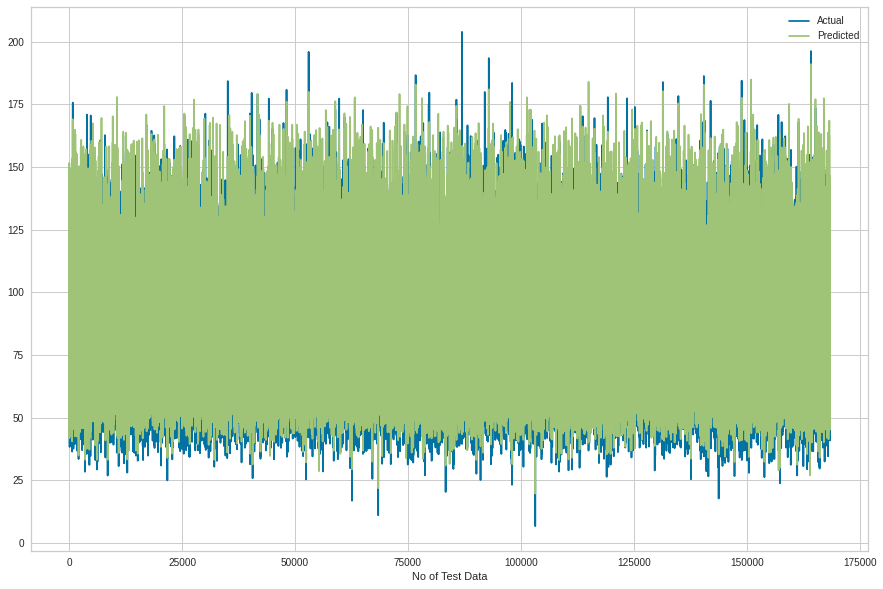

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

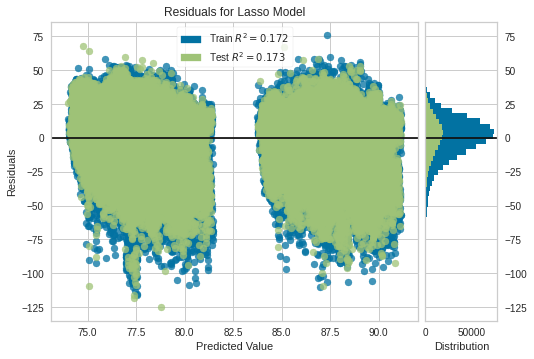

In [ ]:
# Importing ResidualsPlot visualizer
from yellowbrick.regressor import ResidualsPlot

# Importing the Linear Regression model
#from sklearn.linear_model import LinearRegression

# Creating the Residuals Plot
visualizer = ResidualsPlot(lasso1, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

In [ ]:
#Prediction Error Plot
from yellowbrick.regressor import PredictionError
predictor = PredictionError(lasso1)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

##ML Model - 3 - **Implementing Ridge Regression**

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001, solver='cholesky', tol=0.0001, random_state=42)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 5.747673283929509
MSE: 62.72564514749587
RMSE: 7.9199523450268225
R2 Square 0.796240019978979
Adjusted R2 Square 0.794875773340866
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.6032783467772225
MSE: 57.67137999181514
RMSE: 7.594167498272285
R2 Square 0.8107686043424764
Adjusted R2 Square 0.8107654506022701
__________________________________


###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


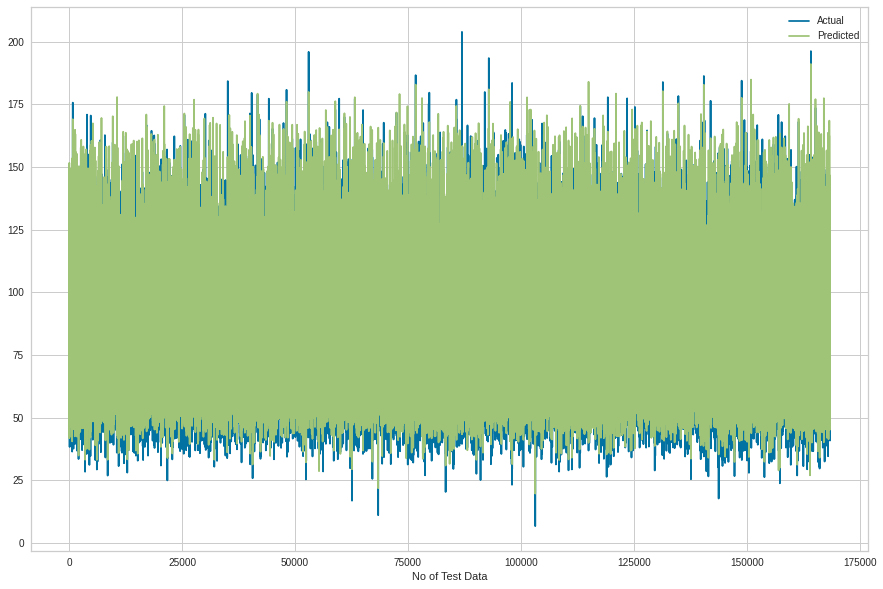

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

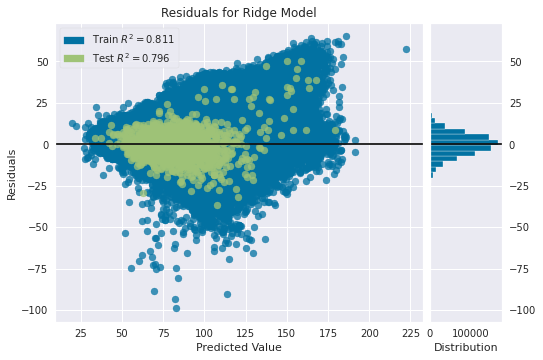

In [ ]:
# Importing ResidualsPlot visualizer
from yellowbrick.regressor import ResidualsPlot

# Importing the Linear Regression model
#from sklearn.linear_model import LinearRegression

# Creating the Residuals Plot
visualizer = ResidualsPlot(ridge, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

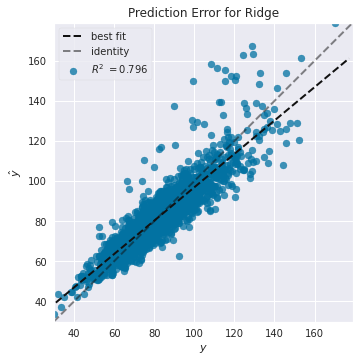

In [ ]:
#Prediction Error Plot
from yellowbrick.regressor import PredictionError
predictor = PredictionError(ridge)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

###2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



ridge1 =Ridge( solver='cholesky', tol=0.0001, random_state=42)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
ridge_regressor = GridSearchCV(ridge1, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

test_pred = ridge_regressor.predict(X_test)
train_pred = ridge_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)

Test set evaluation:
_____________________________________
MAE: 5.599517177505446
MSE: 57.660405476056084
RMSE: 7.593444901759417
R2 Square 0.8111035921828427
Adjusted R2 Square 0.8110878896978684
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.604171712441998
MSE: 57.690311110424574
RMSE: 7.595413820880635
R2 Square 0.8106383103989798
Adjusted R2 Square 0.8106343753536419
__________________________________
The best fit alpha value is found out to be : {'alpha': 0.01}


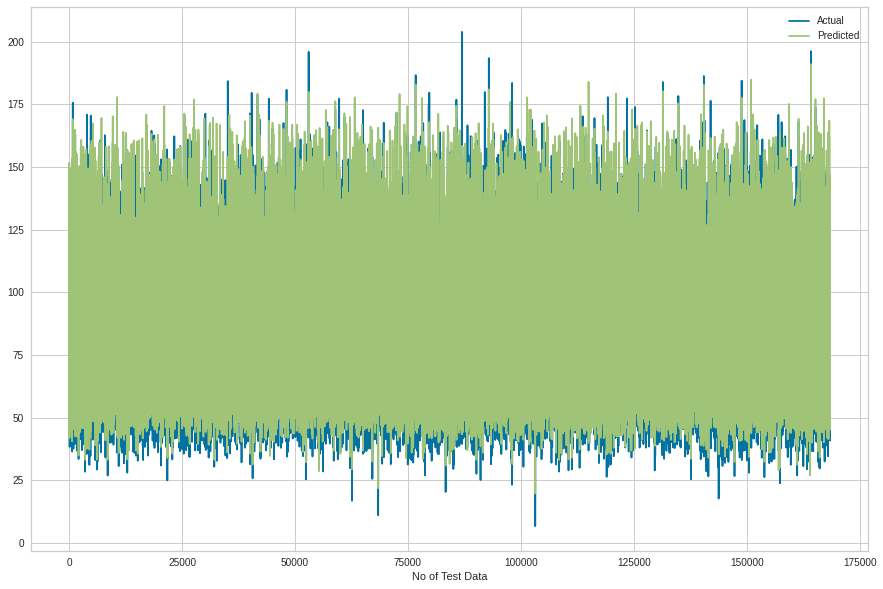

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

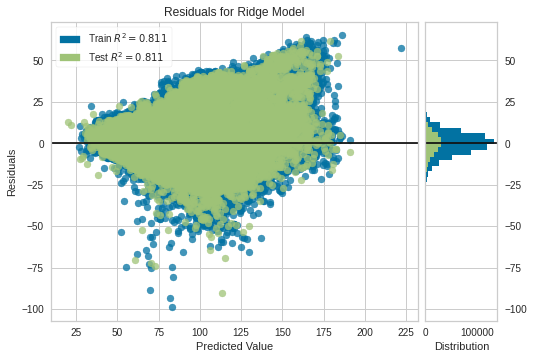

In [ ]:
# Importing ResidualsPlot visualizer
from yellowbrick.regressor import ResidualsPlot

# Importing the Linear Regression model
#from sklearn.linear_model import LinearRegression

# Creating the Residuals Plot
visualizer = ResidualsPlot(ridge1,hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

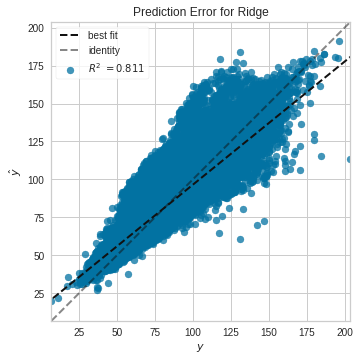

In [ ]:
#Prediction Error Plot
from yellowbrick.regressor import PredictionError
predictor = PredictionError(ridge1)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

##ML Model - 4 - **Implementing ElasticNet Regression**

In [ ]:
#Elastic Net Regression
from sklearn.linear_model import ElasticNet



Elastic = ElasticNet(alpha=0.001, l1_ratio=0.9, selection='random', random_state=42)
Elastic.fit(X_train, y_train)

test_pred = Elastic.predict(X_test)
train_pred = Elastic.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 5.628874645437365
MSE: 57.7433402186253
RMSE: 7.59890388270738
R2 Square 0.8108318966436728
Adjusted R2 Square 0.8108161715733293
__________________________________
Train set evaluation:

MAE: 5.633087314727214
MSE: 57.789141193500505
RMSE: 7.601916942028537
R2 Square 0.810313912226142
Adjusted R2 Square 0.8103099704396226
__________________________________


###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

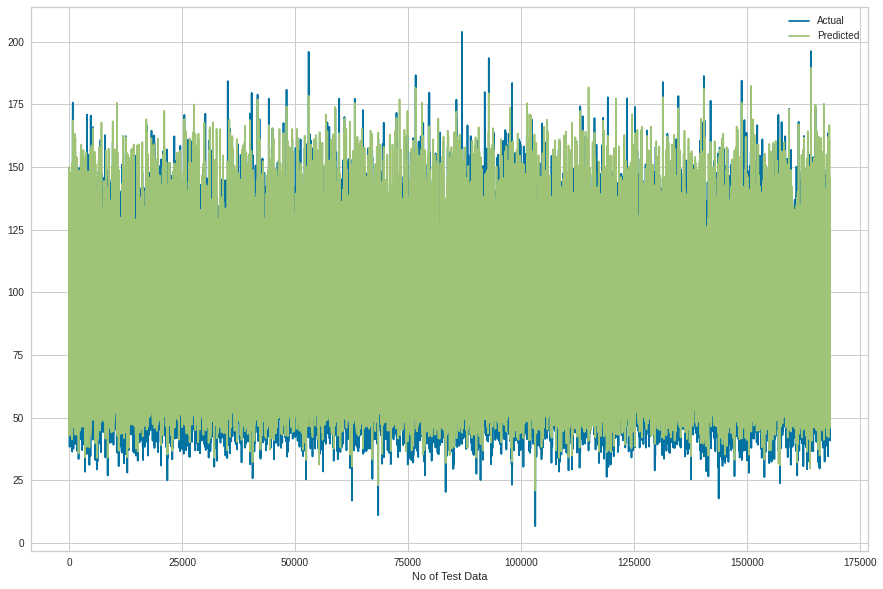

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

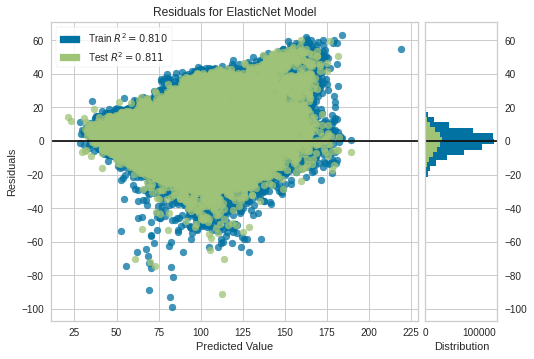

In [ ]:
# Importing ResidualsPlot visualizer
from yellowbrick.regressor import ResidualsPlot

# Creating the Residuals Plot
visualizer = ResidualsPlot(Elastic,hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

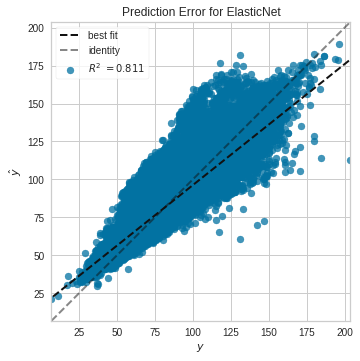

In [ ]:
#Prediction Error Plot
from yellowbrick.regressor import PredictionError
predictor = PredictionError(Elastic)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

###2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



elastic =ElasticNet(tol=0.0001, random_state=42)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(X_train, y_train)

test_pred = elastic_regressor.predict(X_test)
train_pred = elastic_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)

Test set evaluation:
_____________________________________
MAE: 5.599514819440776
MSE: 57.66040687058223
RMSE: 7.593444993583757
R2 Square 0.8111035876143528
Adjusted R2 Square 0.8110878851289987
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.604169382597749
MSE: 57.69031110860308
RMSE: 7.5954138207607285
R2 Square 0.8106383104049586
Adjusted R2 Square 0.8106343753596208
__________________________________
The best fit alpha value is found out to be : {'alpha': 1e-08}


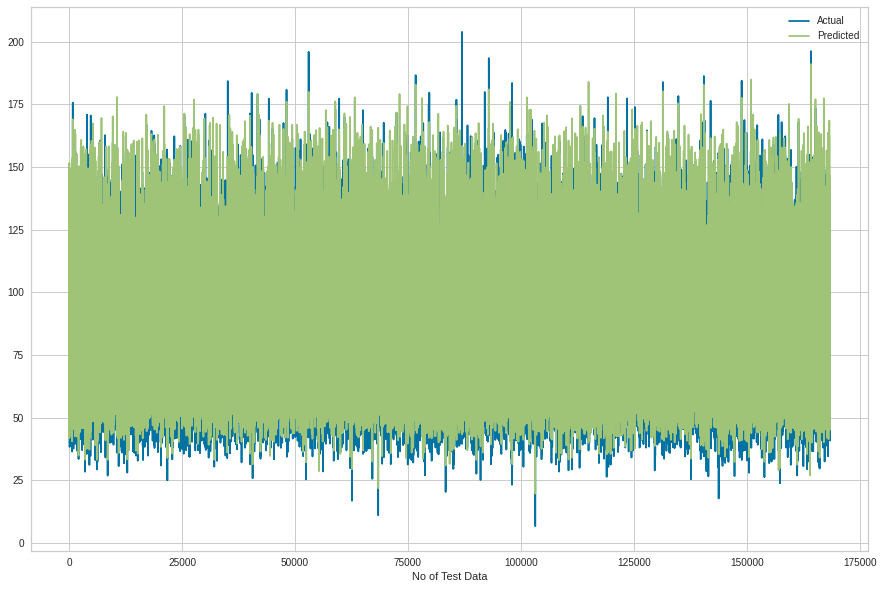

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

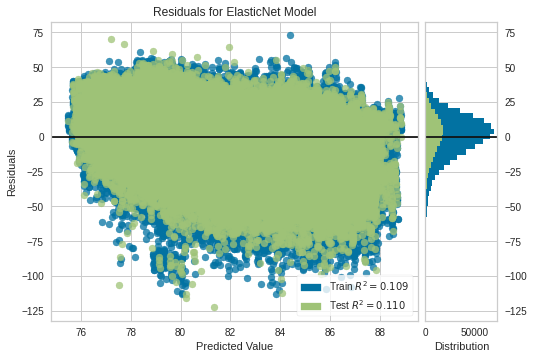

In [ ]:
# Importing ResidualsPlot visualizer
from yellowbrick.regressor import ResidualsPlot

# Creating the Residuals Plot
visualizer = ResidualsPlot(elastic, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

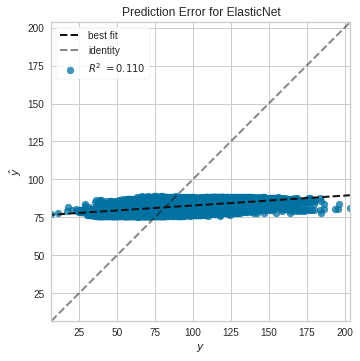

In [ ]:
#Prediction Error Plot
from yellowbrick.regressor import PredictionError
predictor = PredictionError(elastic)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

##ML Model - 5 - **Implementing Decision Tree Regressor**


In [ ]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.869021115046594
MSE: 15.279186586053484
RMSE: 3.908860011058657
R2 Square 0.9499451410956152
Adjusted R2 Square 0.9499409801606408
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.07951113249267047
MSE: 0.17040133328819104
RMSE: 0.4127969637584451
R2 Square 0.999440677580678
Adjusted R2 Square 0.9994406659576349
__________________________________


###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

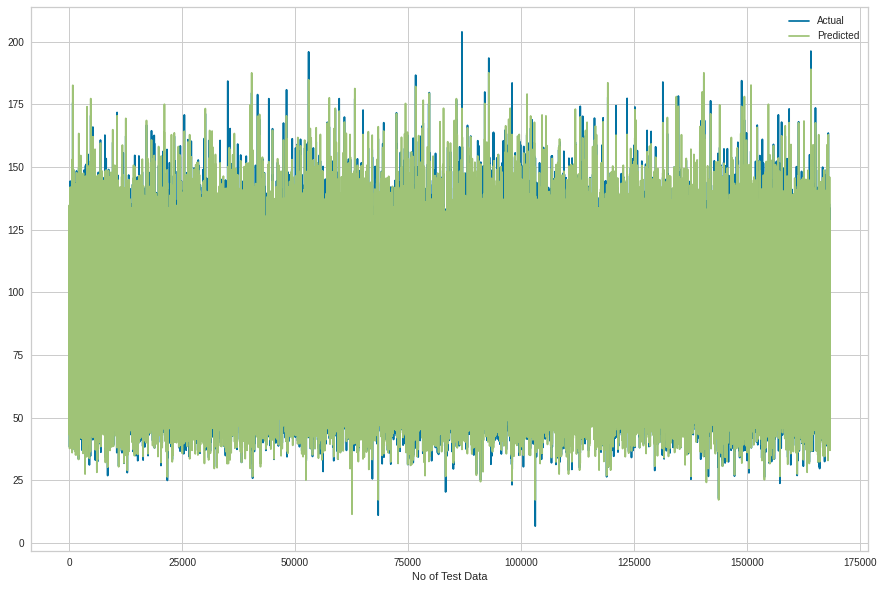

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

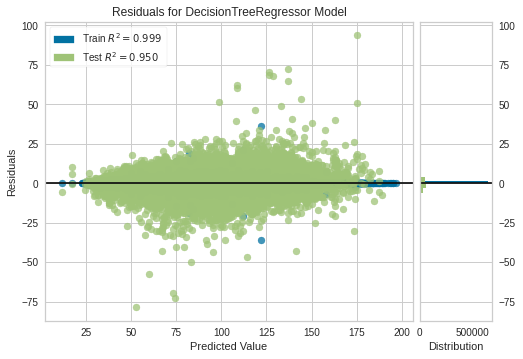

In [ ]:
# Importing ResidualsPlot visualizer
from yellowbrick.regressor import ResidualsPlot

# Creating the Residuals Plot
visualizer = ResidualsPlot(DT_model, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

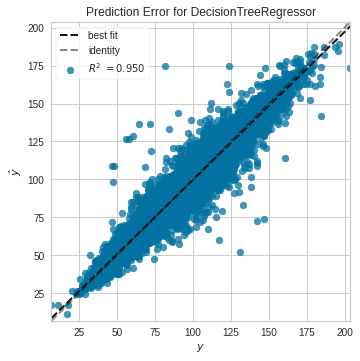

In [ ]:
#Prediction Error Plot
from yellowbrick.regressor import PredictionError
predictor = PredictionError(DT_model)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

###Feature Importance For Decision Tree Regressor

In [ ]:
columns = list(X_train.columns)
columns

['Store',
 'DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'Promo2',
 'Month_0',
 'Month_1',
 'CompetitionOpenSinceMonth_0',
 'CompetitionOpenSinceMonth_1']

In [ ]:
#getting weights of all the features used in the data
feature_importance = DT_model.feature_importances_
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
2,Customers,0.751039
8,CompetitionDistance,0.061444
6,StoreType,0.059197
0,Store,0.041905
3,Promo,0.039334
7,Assortment,0.011849
13,CompetitionOpenSinceMonth_1,0.011441
9,Promo2,0.007856
11,Month_1,0.006183
12,CompetitionOpenSinceMonth_0,0.003735


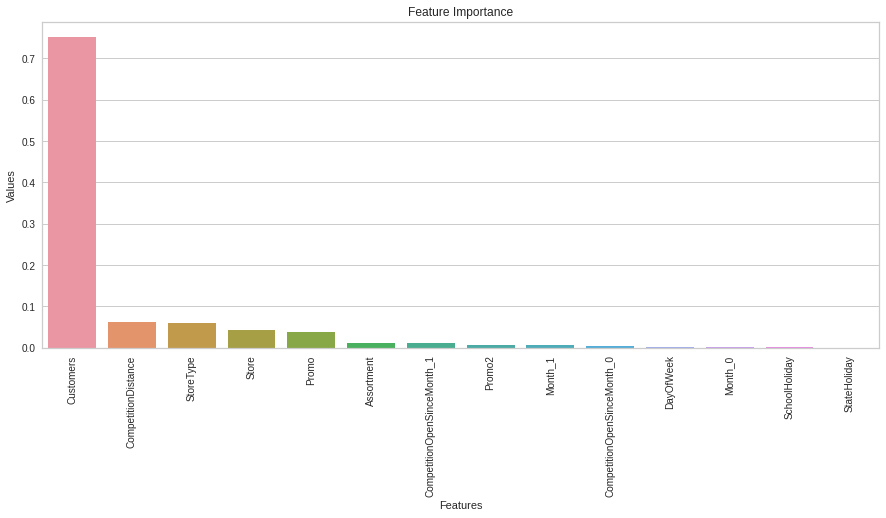

In [ ]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

##ML Model - 6 - **Implementing Gradient Boost Regressor**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

test_pred = gb_model.predict(X_test)
train_pred = gb_model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 4.721341178522853
MSE: 37.133813856428084
RMSE: 6.093752034373247
R2 Square 0.8783490336545925
Adjusted R2 Square 0.8783389211146388
__________________________________
Train set evaluation:

MAE: 4.721788161141301
MSE: 37.20911855097248
RMSE: 6.099927749651833
R2 Square 0.8778654262430626
Adjusted R2 Square 0.8778628882160411
__________________________________


###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

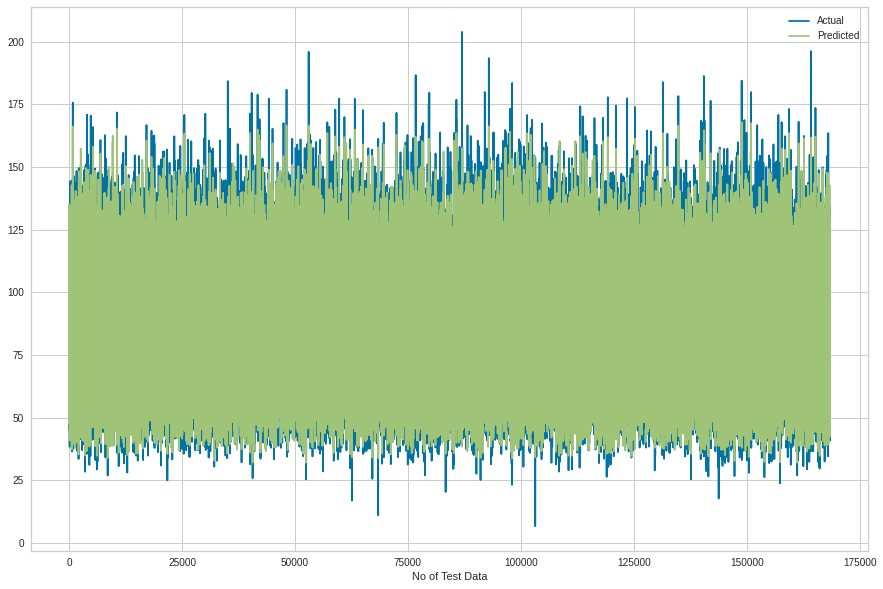

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

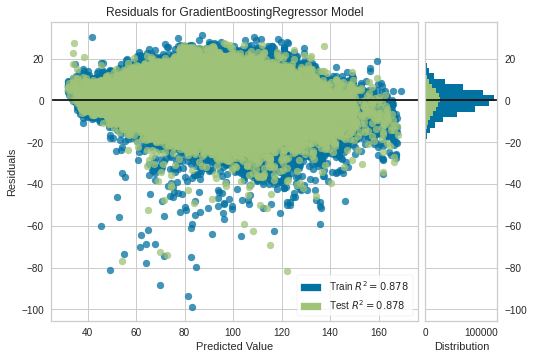

In [ ]:
# Importing ResidualsPlot visualizer
from yellowbrick.regressor import ResidualsPlot

# Creating the Residuals Plot
visualizer = ResidualsPlot(gb_model, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

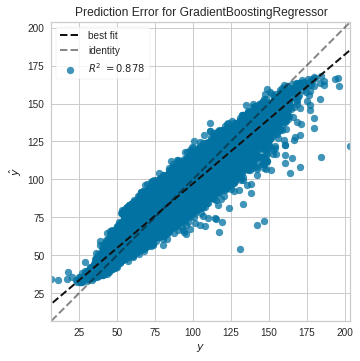

In [ ]:
#Prediction Error Plot
from yellowbrick.regressor import PredictionError
predictor = PredictionError(gb_model)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

###Feature Importance

In [ ]:
#Feature Importance For Griadient Boost Regressor
# features used
columns = list(X_train.columns)
columns

['Store',
 'DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'Promo2',
 'Month_0',
 'Month_1',
 'CompetitionOpenSinceMonth_0',
 'CompetitionOpenSinceMonth_1']

In [ ]:
# getting weights of all the features used in the data
feature_importance = gb_model.feature_importances_
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
2,Customers,0.835150
6,StoreType,0.052726
3,Promo,0.048249
8,CompetitionDistance,0.030819
7,Assortment,0.017902
9,Promo2,0.006592
0,Store,0.003643
11,Month_1,0.002004
10,Month_0,0.001547
1,DayOfWeek,0.000773


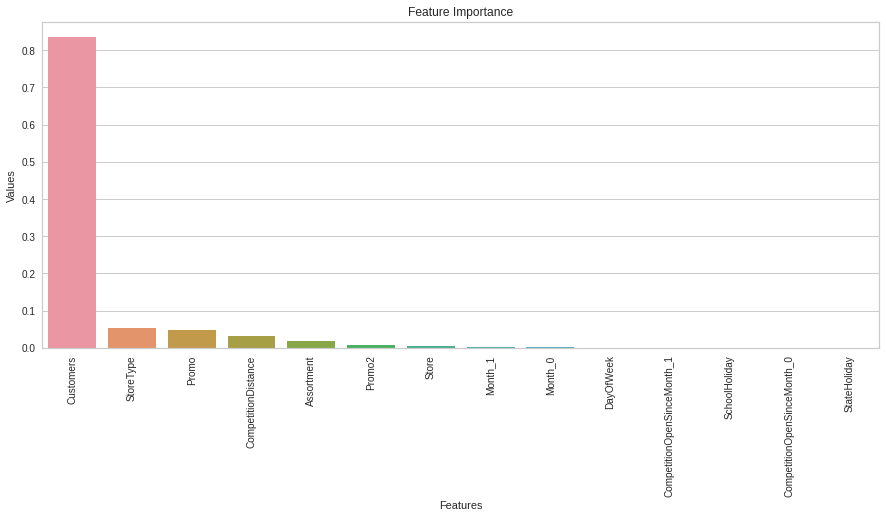

In [ ]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

####SHAP Implementation

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 8.6 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import shap 
import graphviz
sns.set_style('darkgrid') 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.0025, random_state=0)
print(X_train.shape)
print(X_test.shape)

(840046, 14)
(2106, 14)


In [ ]:
# Prepares a default instance of the random forest regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=30,max_depth=8)
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=30)

In [ ]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)

We are just taking the test size small because, it has very large data so , it takes lot of time.

In [ ]:
shap_values = explainer(X_test)

Permutation explainer: 2107it [07:45,  4.47it/s]


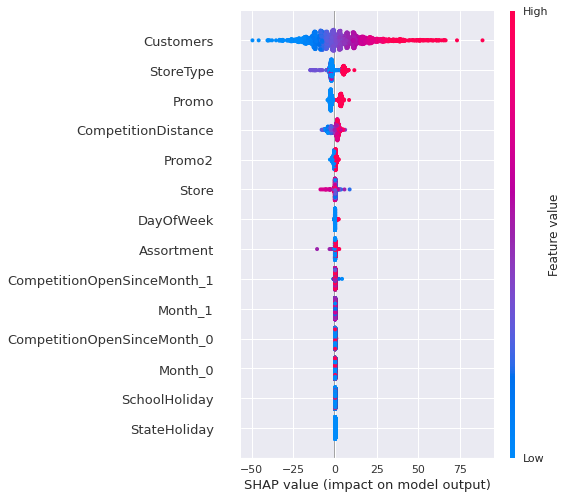

In [ ]:
shap.summary_plot(shap_values)

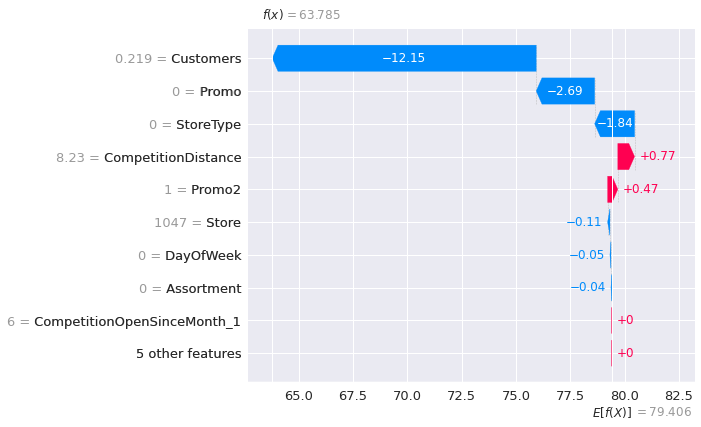

In [ ]:
#waterfall plot
shap.plots.waterfall(shap_values[0], max_display=10)

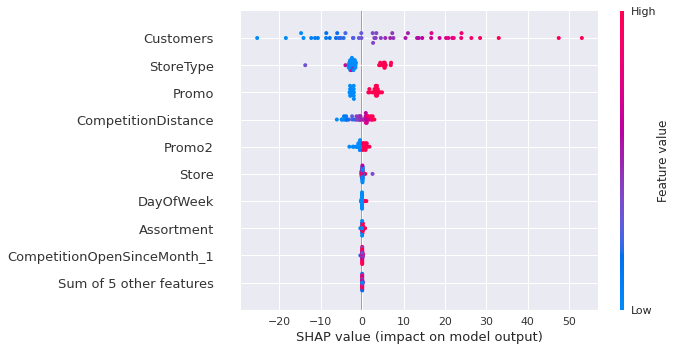

In [ ]:
# Plots the beeswarm
shap.plots.beeswarm(shap_values.sample(50))

##**Conclusion**